# <center> Movie Sentiment Analysis </center>

# 0. Webscraping

# 1. Basic Text Processing Steps

    1.1. Web-scrape the data, save it into a CSV File
    1.2. Read the data and create it into an object using shallow copy/deep copy.

# 2. Text Pre-Processing Steps
    2.1. Convert Review text to lower case
    2.2. Expand contractions
    2.3. Remove accented data
    2.4. Remove scrub words
    2.5. Normalization
    2.6. Remove stop words
    2.7. Stemming
    2.8. Lemmatization


# 3. Exploratory Data Analysis
    3.1 The distribution of review sentiment polarity score
    3.2 The distribution of review ratings
    3.3 The distribution of review text lengths
    3.4 The distribution of review word count
    3.5 The distribution of top part-of-speech tags of review corpus
    3.6 Distribution of sentiment polarity score by recommendations
    3.7 Distribution of review lengths by recommendations
    3.8 The distribution of top bigrams
    3.9 Analysis of sentiment based on the date of review
    3.10 Identifying the user based on the user category


# 4. Apply Models
## Prepare data for models 
    4.0.1. TF-IDF
    4.0.2. Clustering

## Building Models
    4.1. Logistic Regression
    4.1.1 Logistic Regression with clean lemmatized data
    4.1.2 Logistic Regression with plain data
    4.2. Naive Bayes
    4.3. SVC
    4.3.1 SVC with clean lemmatized data
    4.3.2 SVC with plain data
    4.4. Random Forest Classifier
    4.4.1 Random Forest Classifier with clean lemmatized data
    4.4.2 Random Forest Classifier with plain data
    4.5. XGB
    4.6. LSTM (DEEP LEARNING model)
    4.6.1 LSTM with clean lemmatized data
    4.6.2 LSTM with clean plain data

In [1]:
# Import relevent libraries to do web scrapping of ratings

import requests
import time
import csv
import pandas as pd
import numpy as np

import re
import requests
import matplotlib.pyplot as plt

import spacy

import random
random.seed(123)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import functions for expanding contractions and remove accented characters
from contractions import CONTRACTION_MAP
import unicodedata

# to perform deep and shallow copy of the data
import copy


import spacy
nlp = spacy.load("en_core_web_sm")

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

from nltk.stem.porter import PorterStemmer

from textblob import TextBlob

from plotly.offline import init_notebook_mode,iplot

import plotly.plotly as py

import cufflinks as cf

# For histogram plot from Plotly
import plotly.graph_objs as go

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# load in all the modules we're going to need
import nltk, re, string, collections

from nltk.util import ngrams

from nltk.tokenize import word_tokenize, sent_tokenize

from sklearn.model_selection import train_test_split

# 0. Perform WebScraping to retrieve user reviews of 'LION KING' movie

In [ ]:
# Install required packages

!pip install requests
!pip install contractions
!pip install textblob
!pip install cufflinks

In [ ]:
# Capture header of the 'rottentomatoes' as user

headers = {
'Referer': 'https://www.rottentomatoes.com/m/the_lion_king_2019/reviews?type=user',
'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.108 Safari/537.36',
'X-Requested-With': 'XMLHttpRequest',
}

In [ ]:
# Retrieve url

url = 'https://www.rottentomatoes.com/napi/movie/9057c2cf-7cab-317f-876f-e50b245ca76e/reviews/user'

In [ ]:
# Capture payload

payload = {
'direction': 'next',
'endCursor': '',
'startCursor': '',
}

In [ ]:
# Start session

s = requests.Session()

In [ ]:
# Get call

r = s.get(url, headers=headers, params=payload) 
data = r.json()

In [ ]:
# Create 2 empty lists to capture page info and rating info from the webscraping

pg_info = []
rating_info = []

In [ ]:
# Retrieve first 3000 movie reviews and store them in the lists 

for i in range(300):
    update_start = data.get('pageInfo').get('startCursor')
    update_end = data.get('pageInfo').get('endCursor')
    payload.update({'startCursor':update_start})
    payload.update({'endCursor':update_end})
    r = s.get(url, headers=headers, params=payload) # GET Call
    data = r.json()
    pg_info.append(data.get('pageInfo'))
    rating_info.append(data.get('reviews'))
    time.sleep(5)

In [ ]:
# Create empty data frame with Reviewer name, Review, Rating, Date-of-Review columns

col_names =  ['ReviewID','Reviewer Name', 'Review', 'Rating' ,'Date-of-Review']
mv_data  = pd.DataFrame(columns = col_names)

In [ ]:
# Add elements to the data frame created

# len(rating_info) corresponds to total of 300 pages
for i in range(0, len(rating_info)):
    
    #len(rating_info[0]) corresponds to 10 ratings which will be displayed in single page
    for j in range(0,len(rating_info[0])):
        mv_data = mv_data.append({'ReviewID':rating_info[i][j].get('user').get('userId'),
                                  'Reviewer Name': rating_info[i][j].get('displayName'), 
                                  'Review': rating_info[i][j].get('review'), 
                                  'Rating': rating_info[i][j].get('score') , 
                                  'Date-of-Review':rating_info[i][j].get('createDate')},
                                 ignore_index=True)

In [ ]:
# print tail() data from the data frame

mv_data.tail()

In [ ]:
# Retrieve row indexes of the rating > 3 and <=3

rtg_gt_3 = mv_data.loc[mv_data['Rating']>3].index
rtg_lte_3 =  mv_data.loc[mv_data['Rating']<=3].index

In [ ]:
# Add a new column with name Sentiment and capture the sentiment as +ve when
# rating > 3 and -ve when rating <=3.

mv_data.loc[rtg_gt_3,'Sentiment']= 0
mv_data.loc[rtg_lte_3,'Sentiment'] = 1

In [ ]:
# Print head of the data to see the content after adding new column

mv_data.head(10)

In [ ]:
# Drop the 'Rating' column as Rating equivalent data is captured in the 'Sentiment' column

mv_data.drop('Rating',axis=1,inplace=True)

In [ ]:
# Export the data to csv file

mv_data.to_csv('Movie_Reviews.csv')

# 1. Basic Pre-processing



### 1.0 Reading the data

In [2]:
data = pd.read_csv('Movie_Reviews.csv',sep=',')

In [3]:
# Print the shape and head of the dataframe read

print('Shape of the dataframe is\n', data.shape)

print('Head of the dataframe is\n',data.head())

Shape of the dataframe is
 (9650, 6)
Head of the dataframe is
    Unnamed: 0                              ReviewID Reviewer Name  \
0           0  FAA40F30-11D8-47BE-B4E6-C5D4189F8C15      Nicole T   
1           1  DC6BBCFF-9420-4CF3-B55B-0AA3E5D3966A       Jessica   
2           2  9622568D-E6C3-4462-AE83-C6FF8B67FB84    gigglegork   
3           3  e418fc29-856f-4083-afd2-66d166b79518         Lilia   
4           4  77D1F696-A953-4277-8CB0-FA3C29D35E66      Brandy L   

                                              Review  \
0  A little different than the original, but it w...   
1       we disliked the part with Pumba saying brad.   
2  so much better than I expected. Only missed on...   
3                               The movie was great!   
4                           We absolutely loved it!!   

             Date-of-Review  Sentiment  
0  2019-08-24T03:42:00.737Z        1.0  
1  2019-08-24T03:36:57.422Z        0.0  
2  2019-08-24T03:12:25.767Z        1.0  
3  2019-08-24T01:58:3

In [4]:
# Print head of the data

data.head()

,Unnamed: 0,ReviewID,Reviewer Name,Review,Date-of-Review,Sentiment
0,0,FAA40F30-11D8-47BE-B4E6-C5D4189F8C15,Nicole T,"A little different than the original, but it w...",2019-08-24T03:42:00.737Z,1.0
1,1,DC6BBCFF-9420-4CF3-B55B-0AA3E5D3966A,Jessica,we disliked the part with Pumba saying brad.,2019-08-24T03:36:57.422Z,0.0
2,2,9622568D-E6C3-4462-AE83-C6FF8B67FB84,gigglegork,so much better than I expected. Only missed on...,2019-08-24T03:12:25.767Z,1.0
3,3,e418fc29-856f-4083-afd2-66d166b79518,Lilia,The movie was great!,2019-08-24T01:58:31.050Z,1.0
4,4,77D1F696-A953-4277-8CB0-FA3C29D35E66,Brandy L,We absolutely loved it!!,2019-08-24T01:17:44.386Z,1.0


### 1.1 Reading unseen data

In [5]:
# Read unseen test data file

udata = pd.read_csv('test.csv',sep=',')

In [6]:
# Print the shape and head of the dataframe read

print('Shape of the dataframe is\n', udata.shape)

print('Head of the dataframe is\n',udata.head())

Shape of the dataframe is
 (1200, 2)
Head of the dataframe is
    ReviewID                                             review
0     92876  Was good. Nothing like the original but I beli...
1     92877  I absolutely loved it! A wonderful rendition o...
2     92878  I love the movie! Good job director! \nI appre...
3     92879  GREAT MOVIE!!  Same as the original, but the c...
4     92880             Realistic.   Fantastic special effects


# 2. Text Pre-Processing Steps
### Following are set of text pre-processing steps
           1. Convert Review text to lower case
           2. Expand contractions
           3. Remove accented data
           4. Remove scrub words
           5. Normalization
           6. Remove stop words
           7. Stemming
           8. Lemmatization


In [7]:
# Retreive 1500 reecords with positive sentiment

sent_pos = data[data['Sentiment'] == 1].head(1500)
sent_pos.head(10)

,Unnamed: 0,ReviewID,Reviewer Name,Review,Date-of-Review,Sentiment
0,0,FAA40F30-11D8-47BE-B4E6-C5D4189F8C15,Nicole T,"A little different than the original, but it w...",2019-08-24T03:42:00.737Z,1.0
2,2,9622568D-E6C3-4462-AE83-C6FF8B67FB84,gigglegork,so much better than I expected. Only missed on...,2019-08-24T03:12:25.767Z,1.0
3,3,e418fc29-856f-4083-afd2-66d166b79518,Lilia,The movie was great!,2019-08-24T01:58:31.050Z,1.0
4,4,77D1F696-A953-4277-8CB0-FA3C29D35E66,Brandy L,We absolutely loved it!!,2019-08-24T01:17:44.386Z,1.0
5,5,ECB20D9E-1D80-4B1E-B76C-41A39BD1B9B1,kimberly,Isn’t as good as the original!,2019-08-24T00:57:55.430Z,1.0
7,7,961d34f9-09a5-4e6b-9ce6-84eb369ada32,CANDICE,Loved this movie. The animation was incredible!,2019-08-24T00:10:50.081Z,1.0
8,8,45C8EA36-4B0C-4B25-881D-813D49223A79,Charles,Loved every bit of it.,2019-08-24T00:09:03.997Z,1.0
9,9,5353285A-4399-469D-B71B-1FD7A8F127D8,tymsars U,I loved the amazingly realistic visuals for a ...,2019-08-23T23:37:39.847Z,1.0
10,10,f01f86fa-db68-4f23-8de5-98feda6db254,Sarah,Mimicked the original. Brought me back to my 8...,2019-08-23T23:14:00.816Z,1.0
11,11,71512290-A7A5-4600-AFF6-27FD17D04067,Rizo,"visuals were spectacular, as you'd expect with...",2019-08-23T22:33:11.212Z,1.0


In [8]:
# Retrieve 1500 records with negative sentiment

sent_neg = data[data['Sentiment'] == 0].head(1500)
sent_neg.head(10)

,Unnamed: 0,ReviewID,Reviewer Name,Review,Date-of-Review,Sentiment
1,1,DC6BBCFF-9420-4CF3-B55B-0AA3E5D3966A,Jessica,we disliked the part with Pumba saying brad.,2019-08-24T03:36:57.422Z,0.0
6,6,967103462,NaN,the original version is better.,2019-08-24T00:23:09.850Z,0.0
12,12,978209922,Harry H,Was a good enough remake of the original but a...,2019-08-23T22:29:27.483Z,0.0
16,16,BAD220D6-9F1E-491A-9C4D-856A4F1A99E0,momydearst1,The first third of the movie was music. The an...,2019-08-23T20:52:54.084Z,0.0
18,18,EF6D8379-3D10-468B-B4EE-496F3C92E899,disappointed,Very very disappointed. I feel there was a lot...,2019-08-23T19:29:12.866Z,0.0
19,19,978209753,Froster X,I hate all Remakes from Disney,2019-08-23T19:06:36.297Z,0.0
22,22,729b6fb1-4758-44e2-9d11-e99d549527dc,Amber G,Found it boring compared to the original. I'd ...,2019-08-23T17:48:17.232Z,0.0
37,37,978209459,Vladislav B,"No emotions, no feelings, no motion, no beauty...",2019-08-23T13:38:41.168Z,0.0
39,39,783964883,Kevin K,The voice acting in the original one was more ...,2019-08-23T13:23:28.045Z,0.0
47,47,978209385,Edam M,This remake completely ruined what made the or...,2019-08-23T11:48:17.314Z,0.0


In [9]:
data = pd.concat([sent_pos,sent_neg])

print(data.shape)

data.head()


(3000, 6)


,Unnamed: 0,ReviewID,Reviewer Name,Review,Date-of-Review,Sentiment
0,0,FAA40F30-11D8-47BE-B4E6-C5D4189F8C15,Nicole T,"A little different than the original, but it w...",2019-08-24T03:42:00.737Z,1.0
2,2,9622568D-E6C3-4462-AE83-C6FF8B67FB84,gigglegork,so much better than I expected. Only missed on...,2019-08-24T03:12:25.767Z,1.0
3,3,e418fc29-856f-4083-afd2-66d166b79518,Lilia,The movie was great!,2019-08-24T01:58:31.050Z,1.0
4,4,77D1F696-A953-4277-8CB0-FA3C29D35E66,Brandy L,We absolutely loved it!!,2019-08-24T01:17:44.386Z,1.0
5,5,ECB20D9E-1D80-4B1E-B76C-41A39BD1B9B1,kimberly,Isn’t as good as the original!,2019-08-24T00:57:55.430Z,1.0


In [10]:
# Replace 1 as 'Pos' and 0 as 'Neg' to signify the sentiment as positive and negative respectively

data['Sentiment']=data['Sentiment'].map({1: 'Pos', 0: 'Neg'})

In [11]:
data.head(20)

,Unnamed: 0,ReviewID,Reviewer Name,Review,Date-of-Review,Sentiment
0,0,FAA40F30-11D8-47BE-B4E6-C5D4189F8C15,Nicole T,"A little different than the original, but it w...",2019-08-24T03:42:00.737Z,Pos
2,2,9622568D-E6C3-4462-AE83-C6FF8B67FB84,gigglegork,so much better than I expected. Only missed on...,2019-08-24T03:12:25.767Z,Pos
3,3,e418fc29-856f-4083-afd2-66d166b79518,Lilia,The movie was great!,2019-08-24T01:58:31.050Z,Pos
4,4,77D1F696-A953-4277-8CB0-FA3C29D35E66,Brandy L,We absolutely loved it!!,2019-08-24T01:17:44.386Z,Pos
5,5,ECB20D9E-1D80-4B1E-B76C-41A39BD1B9B1,kimberly,Isn’t as good as the original!,2019-08-24T00:57:55.430Z,Pos
7,7,961d34f9-09a5-4e6b-9ce6-84eb369ada32,CANDICE,Loved this movie. The animation was incredible!,2019-08-24T00:10:50.081Z,Pos
8,8,45C8EA36-4B0C-4B25-881D-813D49223A79,Charles,Loved every bit of it.,2019-08-24T00:09:03.997Z,Pos
9,9,5353285A-4399-469D-B71B-1FD7A8F127D8,tymsars U,I loved the amazingly realistic visuals for a ...,2019-08-23T23:37:39.847Z,Pos
10,10,f01f86fa-db68-4f23-8de5-98feda6db254,Sarah,Mimicked the original. Brought me back to my 8...,2019-08-23T23:14:00.816Z,Pos
11,11,71512290-A7A5-4600-AFF6-27FD17D04067,Rizo,"visuals were spectacular, as you'd expect with...",2019-08-23T22:33:11.212Z,Pos


In [12]:
#Duplicating the original text extracted before proceeeding with preprocessing steps

print(type(data['Review']))
original_data = copy.deepcopy(data)
print(data.keys())
print(original_data.keys())

<class 'pandas.core.series.Series'>
Index(['Unnamed: 0', 'ReviewID', 'Reviewer Name', 'Review', 'Date-of-Review',
       'Sentiment'],
      dtype='object')
Index(['Unnamed: 0', 'ReviewID', 'Reviewer Name', 'Review', 'Date-of-Review',
       'Sentiment'],
      dtype='object')


### 2.1. Convert Review text to lower case

In [13]:
# Convert review content to lower case

data['Review'] = [text.strip().lower() for text in data['Review']]
data['Review'][:10]

0     a little different than the original, but it w...
2     so much better than i expected. only missed on...
3                                  the movie was great!
4                              we absolutely loved it!!
5                        isn’t as good as the original!
7      loved this movie.  the animation was incredible!
8                                loved every bit of it.
9     i loved the amazingly realistic visuals for a ...
10    mimicked the original. brought me back to my 8...
11    visuals were spectacular, as you'd expect with...
Name: Review, dtype: object

In [14]:
## Convert unseen data to lower case

udata['review'] = [text.strip().lower() for text in udata['review']]
udata['review'][:10]

0    was good. nothing like the original but i beli...
1    i absolutely loved it! a wonderful rendition o...
2    i love the movie! good job director! \ni appre...
3    great movie!!  same as the original, but the c...
4               realistic.   fantastic special effects
5                     almost exactly like the original
6                    visually stunning, beautiful film
7    did not care for beyonce as the voice of nala....
8     thought it was a good movie overall i enjoyed it
9    we loved every second of the lion king. i even...
Name: review, dtype: object

### 2.2. Expand Contractions

In [15]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    '''Purpose : Funciton to expand extractions for the given column of text 
                 eg., don't,it's will be replaced with 'do not', 'it is' respectively
    '''
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        '''Purpose: Accepts string with contraction as input and expands them based on the values 
                    defined in the dictionary'''
        
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    print(f"The expand match is {expand_match} and text is {text}")
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text


In [16]:
# Expand contractions from the review field of the data frame

data['Review'] = [expand_contractions(re.sub('’', "'", text)) for text in data['Review']]

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is a little different than the original, but it was very good...****
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is so much better than i expected. only missed one feature that i loved from the animated version, but it worked without it.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the movie was great!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is we absolutely loved it!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is isn't as good as the original!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is loved this movie.  the animation was incredible!
The expand match is <function expand_contrac

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is very nice movie! we both cried..( mom and 4 years old daughter)
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the screen play was good, however it lacked the passion in the character's speech a lot of the time it was more like it was being narrated, if they combined the updated graphics with the old soundtrack it would be perfect.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i loved it! i thought the animation was so spectacular, and the music was wonderful! i can't believe the animals weren't real!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is my son liked seeing all the real life animals, however  i think the cartoon was the better of the two movies.
The expand match is <function expand_contraction

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is is good but they cut the best parts of it and add some nonsense extra that was not need it
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is beautiful cinematography! the backgrounds are awesome and the cgi of taking animals is very believable.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is good movie... cgi was incredible. only thing i didn't like was the singing.... the singing was way different from the original songs
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was a great movie. i would have given 5 stars, but its a remake of a classic. still it was an amazing film. the live action remake was stunning.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> a

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was a charming remake of a disney classic. a bit of a snooze as far as the storyline since i already know it. beautiful scenery of africa and the wild animals.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was a great movie
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is good family movie with learning situations, and lots of emotions from sadness to pride and happiness! we loved it!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is so similar to the 90s version! i loved the actors and having the original scar voice him again was incredible!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the lion king is very good movie! beautiful land with a

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is excellent movie. soundtrack off the hook
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is amazing, the best film ever made, hakuna matata
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was a beautiful remake of a classic that brings tears and laughter. could watch it on replay all day.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the original was my favorite movie but it has started to look dated.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is this movie was good i liked it
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it felt like watching a nature documentary but with  out a narra

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i am really not a fan of beyonc and i believe they couldve picked somebody else to play that role and i do not like how they took out the one song to add her new single
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is beautifully made movie.  absolutely loved this movie.  
the only negative thing is that very young children would be afraid of the violent parts.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is super cool graphics made me super emotional 12/10 experience!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is amazing! loved it from beginning to end 💕
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is beautiful movie.... master-crafted....lives up

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is went right along with the animated version. just the best. only thing i didn't like was that the one hyena was mean. hmm. i guess they needed the antagonistic character but it was a loss of a funny one.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i liked that it stuck almost entirely to the original movie.  the visuals with "real animals" was fairly impressive without looking too digitized.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is loved this movie!  went to see with 9 yr old grandson.  so realistic & tugged at our heart strings!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is a classic brought back to life tastefully. loved it.
The expand match is <function expand_contractions.<locals>.expand_ma

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the original story line was there and the movie gave the feels when it needed to but it was long in spots where it became too much of a nat geo movie.  it would have been a half hour shorter without the filler.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is there is nothing bad about the movie, i just felt that i enjoyed the original more
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is did a great job on the animation and following the original story
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is grandma and i took 3 grandkids age 11 to 15.  we all loved it.  the critics get only 1 star for their poor judgment.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> 

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is although the new lion king movie is visually astounding there is limited emotions on the lions face
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is beautiful!!!! ❤️❤️❤️
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the cgi was good except for the lions legs. they did a good job. better singers would have been good. just a personal preference. but overall was good!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is timon and pumba are the best part of entire movie. i in tears of laughter multiple times. the lions looked too real, but i'm not mad. enjoyed it.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is some unnecessary lines
The expand match is <fu

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is very good adaptation of the original cartoon with realistic looking animation.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is wonderful and pretty close to the original!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is loved it. i loved the original cartoon so i have it a shot and tell on love.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is same history, more realist. good work.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is this story will never grow old....just a fresh perspective on wonderful!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was wonderful!! my family loved it! there i

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i didn't go to see it..... i will!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is very realistic.   beautifully done.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the lion king was so far fantastic movie.!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is great music. interesting use of animals. introduction was poorly filmed, but the remainder of the film had good cinematography, too long.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i really liked this movie
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is movie dragged for the first 40 minutes but ended strong.
The expand match is <fu

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is grandchildren loved this movie
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is loved the fact that the animals looked so real
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is fantastic movie 🎥 🍿
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i loved it seen it 4 times would recommend it to everyone who asks me
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is great cinematic experience!'
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i have always loved this story but the animation really made this come to life. i got shivers down my spine when the lions roared and especially during the right

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is my teenage son and i went to see it today and we both thought it was amazing. he wasn't even close to being born when the original came out, but of course he's seen it dozens of times. now he's a gamer and video maker/editor. he warned me as we were walking in that he might be overly critical but we had both agreed we needed to see it in the theaters before it was gone. even though we both knew the storyline backwards and forwards we were totally sucked in from beginning to end. there were times that i personally felt anxious, like i didn't know what was going to happen. i'm glad we didn't bring his little sister (7 years-old, but very sensitive) as she would have been scared during several parts. my son and i had both heard not-so-great reviews, so we were on the lookout for negatives but neither of us walked away with any negatives to talk about. the animals and scenery were ama

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was awesome. loved the animation and the music was spectacular.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is excellent remake of the original, but with all the bells and whistles we've come to expect from disney's latest live action renditions of their classic animated features. all the songs. all the characters. some new singer/songwriters adding their voices to the beloved pieces from the original. all in all, quite satisfying and family friendly!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is abit slow but i like it
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is this was a super cute movie
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is 

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i liked the entire movie!!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was better than i expected.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i love when they are brothers and zamba for the musfsa too protect each other
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was very realistic, but some characters were a little too far off from their animated characters, mainly scar.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was a very good movie
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is kept true to original. very well made. graphics were on point.
The expand match is

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is body language of animals
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the animation was awesome! great characters
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is good service great experience
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is followed the original cartoon film almost entirely the same.  enjoyable movie to watch.  nice put together of incorporating the beauty and the beast dinner scene into the part where pumba becomes bait.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is exactly what the movie should have been. they didn't overdo anything! loved it!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is beautiful in every way imaginable. a must see on the big screen.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i loved it it is a go to see movie
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i love this movie a hole lot  it was very fun i   like the new one better
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is amazing movie from my childhood
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i liked how the story line went and the music was just right. great job on remaking this movie
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is definitely not for kids but good
The expand match is <fun

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is watching the movie made me feel like a little kid again watching the original for the first time
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is loved it!
hakuna mattata❤❤🤙
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is loved every second of it, tugged on every emotion
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is very well done for a live action cgi version of the greatest disney film ever made. they kept the film nearly the same as the original, would be a five star if they had completely kept it the same, but hey that's hollywood i guess they have to ruin something
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is with the original animated feat

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is beautifully done movie. recommend for family viewing
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is loved the whole movie, just got a little motion sick at times
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is everything about it was great.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is my husband, daughter and myself loved the movie.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is loved everything about it!! i dont want to say exactly why cause itll spoil for those who hasnt seen it .. so nostalgic!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is absolutely loved the entire movie!
The exp

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is loved this movie and was amazed by the detail in the graphics and presentation. had the same family feel as the first with a life like display of images that made my youngest ask if i was sure lions couldnt talk in real life lol. i know there are always comparisons to the original but i personally loved that it didnt stray too far from the first film.  the story line was already amazing and this just brought the story to life even more for a generation that may criticize the now outdated animation of the first film.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is loved it...great family movie!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i loved the scenery and the beautiful colors and how real all the animals looked.!
beautiful story and highly entertaining !
T

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i liked the fact that it was animated but expected it to be more along the lines of a sequel, not the exact same storyline...
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is amazing childhood all over again and graphics were amazing realistic
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is loved this new version of lion king.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the boys and i loved the movie.  fantastic scenery, great animation.  so realistic.  well done.  nothing new in the end but well worth seeing.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is animals where realistic
The expand match is <function expand_contractions.<locals>.expand_

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is lived the message and appreciated sticking to the original story line and not pushing an agenda as do so many movies these days.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is liked: the animation
dislike: the music (poor orchestration)
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was good but violent. litttle kids should not see the movie
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is exactly like original
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is absolutely loved it.  so incredibly realistic that im convinced the animals were trained to mouth the words. highly recommend
The expand match is <function expand_contractions.<locals>.expan

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the movie had awesome animation and cgi. the characters were so realistic and kids had alot of fun seeing. the only reason i took a half star off was because it was exactly the same as the original in terms of plots and speech so you would know exactly know what was going to happen or what was going to be said next. otherwise it was a great movie!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the story line and nature
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is beautiful cinematography! loved how it was almost like the animated film from the 90's.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is very life-like! same great story!
The expand match is <function expand_contractions.<locals>.expand_match at

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it's good, stays in line with the original movie which i liked. what i didn't like were some of the voices, beyonc was the absolute worst, terrible voice over
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is no dislikes, the animation was so life like.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is much to graphic and violent for children. wonderful for adults!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is they have made this national geographic
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is if was good! enjoyed it, but sad
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the movie was stu

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is enjoyed it. glad it kept with tradition of the story.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the only thing i didn't like was the deleted hyena scene where he says mufasa myfasa mufasa!!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is pumbaa and timon were amazing! i really hope they remake the 2nd lion king
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is great cinematography. not as many good songs compared to the original lion king.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is reminded me of being a kid - great movie.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is good movie.

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is visually stunning remake.. voice overs and songs are terrible compared to the original.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i loved this movie. it was an awesome experience to take my daughter to go see a movie i grew up watching.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is amazing! lion king was one of my favorite disney movies growing up. the computer graphics used are unbelievable. so lifelike! this is an amazing movie!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i love this movie so much than i love the classic!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is loved the movie it was great
The expand match is <function expand_c

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is good but not fantastic. worth the watch but not a second time. cgi is phenomenal
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it lacked some emotion between the animals expressions and the voice actors, however, it was still a great live-action remake
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is childhood memories flooding back! i loved it! no complaints i enjoyed every second of it.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is nothing beats the original, but it was pretty darn good!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is loved it. cried twice.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is loved it...took me back to my adolescence! 👍🏾👍🏾
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is wonderful remake -he cast worked beautifully
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was great overall. 4 stars bc i didn't cry the tragic moment but my husband and sister did tear up. the minor plot changes were all suitable except rafiki did not hit simba in the head to teach him that the part hurts but you can either run from it or learn from it. i thought the exemption of that part was unnecessary. the rest of the changes/ additions were good in my opinion.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is for it being a live action it was well done. 
as for it being a live action if a film that ive 

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i really liked it i really thought some of the scenes were done really well and the music i thought was just as good as the cartoon, like i really liked the hakuna matata scene and the can you feel the love tonight i though those both sounded really well!!!!  overall i really liked it for a disney remake the scenes were more intense than the cartoon especially at the end when simba was fighting scar!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i enjoyed the whole movie. it took me back to 1994, when lion king became my favorite movie. although it had different scripts (some added, some removed), the remake was awesome.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was ahhhhhmazing!!!! there were times i wanted to take my phone out to take a picture it see

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is achingly beautiful.   this redux is faithful to the original story, but the cinematography is far superior to the first.  i would watch it over & over again.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is excellent movie loved the duet with beyonc and donnie glover was beautiful.  the cinematography was great!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i was prepared not to like the movie based on some reviews that id read. ive seen the original as well as the musical (twice). the movie was true to the storyline. the animated characters looked real. scenery was beautiful
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is loved the real animals. they did leave out a couple scenes from the animated movie.


The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i enjoyed watching this movie on a visual and cinematic scale, but i honestly did not feel the magic that radiates from the original animated movie. this is likely because the movie's goal and focus (besides making lots of money) is on presenting photorealistic animals and showing off how far they've come with graphics, certainly given disney's profits and resources. make of that what you will, but the magic and emotion of the original were sacrificed about 40-50%
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i loved how real it looked. stayed very true to the animation. loved the amount of action.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is everything was good but beyonce's voice
The expand match is <function expand_contractions.<locals>.expand_match at 0x00

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was so life like!  could believe the animals were talking!  beautiful scenery!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is this remake was so good! the voices for the characters were cast perfectly. lion king 2019 is a visual treat, flawlessly sewn together keeping the story of the original moving seamlessly. if there were any drawbacks, it would have to be the lack of humor between the sidekick characters of timon and pumba, and the mostly spoken, much shorter version of be prepared. my family and i still look forward to owning this movie when it is released on blu-ray.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was wonderful , very well made n executed. the animation was beautiful.  my granddaughters, ages 12 & 14 loved it.
The expand match is <fun

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is loved how they used real animals.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i loved everything about the movie.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is absolutely adorable and beautiful
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is everything was great from the storyline to the lights and sounds.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is we loved this movie!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is in tears! i loved the movie, amazing effects.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is better than th

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is my 10 year old granddaughter and i loved the movie! it was incredible to see with live animals. wondering how many, if any, were animatronic. however, all the animals looked very real and alive.  the scenery was spectacular too. glad the original music was kept. it is so beautiful. that was where the mary poppins' remake went wrong!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is loved it.   graphics were so real looking   love the moral of this movie.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i loved the movie beautiful visuals,  characters we wonderful and i am looking forward to part 2.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is beautiful scenery and animals however a bit intense and perhaps f

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is this is my favorite play and also saw the last movie. asked my 14 year old granddaughter to go with me to a matinee. she loved it and admitted it. the animals look so real that little kids in the audience would scream for or against different scenes in the movie. highly recommend.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is amazing story now paired with the most amazing cgi.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is beyonce is great and all but i don't believe she was the right person to play the role of nala.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i needed that 94 feel to it
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is awesome

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is my family & i loved the movie. i wish is was more of a cartoon version but it was still good. a few changes but it was very similar. definitely worth it.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is hard to beat the original. slow at first.  you could enjoy it just as much at home.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is nice movie . one time watch .
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is visually impressive, the cgi is almost indistinguishable from reality. follows the story of the original and probably more enjoyable for those who haven't seen it but a little repetitive for those of us who have.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F15

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i loved everything about the movie. great job great job!!!!!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is brilliant movie.  i'm glad they had not changed the storyline.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it's good just missing some classic stuff
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is loved the animation so lifelike. did a great job!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is well done! nice job not making it trash like aladdin v 2.0. (horrible script rewrites). it was delightful to see things kept real and consistent. was worried they would mess this up like they did aladdin but looks like we're good to go! also have 

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is that's really good one.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is excellent cast, excellent production, one of the best put together movies i've ever seen, good for adults and children, soundtrack was excellent also
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is beautiful... felt like a child again
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is amazing.  my family love the movie. disney movie so great for children and adult.  so magic.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i thoroughly enjoyed it. it was exactly what i expected it to be. of course its not the original animation and of course there are some differences. i enjoyed it

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is slightly different storyline from the original, but nonetheless wonderful!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is beautifully remastered.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i really loved seeing the real-life animation and hearing the songs that i knew so well from the original movie however, i wish some changes had been made to the storyline to make it more than just a frame-by-frame recreation of the original movie.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is kept to the original, but also changed subtle things for the better. made it seem as if these living beings could actually interact this way.
The expand match is <function expand_contractions.<locals>.expand_match at 0x00000

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the movie was good but not great! i believe in the duet between donald glover and beyonce wasn't as great as it could've been because beyonces voice took over at some parts and it didn't sound in harmony as a duet. the movie is definitely worth the watch though! the cgi was incredible and it's amazing how they stayed with the original story just with a few extras in it
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is this movie is definitely my top pick for disney live action remakes, and just disney in general. most people who hate it just hate it so they can feel "og". and people who called this movie lazy, don't know the definition of lazy. a single blink in this movie is probably tens of thousands of dollars of cgi you missed. how good the cgi is makes this the least lazy live action remake. considering how they could n

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is good story. great computer animation.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is great story, great action!  too intense in places for the very young (pre-school) but it can be a great springboard for discussing responsibility and accountability.  not a new story, but very well done as a re-make!  music is fun & light-hearted.  grandson & i loved it!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is we really enjoyed the movie. it followed the original pretty well!!  went in not expecting it to be as good as it was.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is as my daughter grows older this movie was perfect timing. her dad and i took her and we all love this movie!  i highly recommend it.
The expand

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the movie was amazing!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is much better than the original animated film. especially in the ending fight scene.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is cute and good, but beyonce sang crazy.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is stunning cinematography. great music. wonderful humor.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is little ones might cry because there are moments there's sudden loud noise. we loved it, even made me jump at times.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is graphics cad was good. good image to origi

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i was so excited for this movie and got out of it so disappointed. it was my childhood movie and this remake is just awful. the only thing i liked was pumba as a baby
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is overall the voice actors didn't fit the characters in my opinion, with the exception of pumba. i didn't feel a lot of connection between myself and the voice performers. the cg was amazing and beautiful to look at but couldn't make up for the lack of a compelling story. i wouldn't necessarily recommend this movie to a friend to spend $10 to go watch in theatres.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was good if you're tone deaf, i suppose. the songs were butchered. cinematics were fine, to be expected but they could have done so much more. i

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is shot for shot remake of the original. some of the script seems forced, but billy eichner, seth rogen and nostalgia keep this film alive.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is really underwhelmed, the music was a little slower paced then the originals, didnt give some of the characters the personality which took away from the movie and then that bullying phrase rewrite was total garbage..
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is poor remake of a classic. lacked character and substance in every respect.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is there was no need for another animated version that was almost a shot-for-shot remake of the original.  billy eichner and seth rogan were the be

disgrace..
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it only gets two stars (rather than one) because the cgi was amazing. otherwise it was apparently an attempt to get the worst voice actors for every part (other than mufasa which was still voiced by james earl jones and was as amazing as ever). otherwise, the voice acting was abysmal. scar (chiwetel ejiofor) was just plain terrible. the voice actor for timon (billy eichner) was apparently required to have the most over the top gay affectation possible (although one of the best singers). and nala (beyonce) sounded so ghetto it was distracting. watch the animated version which is vastly better. sad since disney did such a fantastic job with the aladdin live action remake.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is was a complete copy of the original movie.  i preferred the original cartoon version. so far bea

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is not much humor. not even close to as good as the original. i had high hopes after watching the jungle book remake by this director. just seemed uninspired. it had pretty good cgi however.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was fine. basically a shot for shot remake of the original without the fun and emotion. this won't be replacing the animated version in our viewing list.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is this movie is the most uninspired cash grab i have ever seen in my life. it's sad to see such a gross waste of talent with the amazing visuals to the amazing voice actors i wish they did something original instead of the same useless boring formulaic garbage
The expand match is <function expand_contractions.<locals>.expand_match at 

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is okay. the movie was just okay. in the heat of disney's phase of making all these live-action remakes, i found this to be very subpar. the original is infinitely better in practically every way. this kind of movie wasn't necessarily made to be in live-action. in fact, i'd say most of these disney remakes were never meant for live-action. they were meant to be animated family fun for everyone. anyways, this movie is definitely visually impressive, that's the movie at its strongest. however, it fails to recapture the spirit in the original in nearly every way. just watch the original.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is b- at best. the artwork was amazing, animation and vfx superb but most the cast fell short on the acting side, and the musical aspects as a result of their voices and interactions fell short.
The e

and music.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i'm done with disney live adaptation they all suck
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is bland, colorless, and lacked character. the songs were so devoid of the original sass and personality from the original and visually, all the lions looked the same and expressionless. all the gorgeous colors and scenes from the original were desaturated and the life was sucked from them. the vas have amazing voices but it felt like listening to a music video rather than a kid lion singing. i'd recommend the original or the musical, not this one. regret buying a ticket
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is not good.  good cgi. rest was crap.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is t

the biggest take away the was the sudden beyoncé song playing on the return to pride rock. it was definately not needed.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is a kids movie with no crude language
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it's been a very long time since i've seen the animated lion king, but from what i could tell, this film was basically a shot-for-shot remake with a few new jokes/dialog switches to maybe set it apart. which, in a way seems kind of a pointless thing to do. & although it was visually stunning, i feel like the emotions i was supposed to be seeing them feel was hard to translate on a realistic version of these animals. "real" animals just don't emote the same way people do which is where i think the animated film has an advantage; animations can bend those rules a bit. don't get me wrong, i still totally cried when mufasa di

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was okay - took my granddaughter (10) and she liked it somewhat.  although the story line was the same, and the movie was long, the characters were not developed enough - too choppy.  recommend waiting for dvd
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is slow and a pointless remake
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is this lion king is a 'not-as-good' follow up. 
thank goodness for beyonce who offers the only fresh thing worth seeing in this adaptation. 
while watching you want to leave the theatre and go watch the cartoon because they just didn't quite get the moments right, and it's super disappointing. 
similar to robin williams as the genie, rowan atkinson brought so much life to zazu that john oliver just can't live up to.
ya it was bad. best 

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i didn't hate it but it was completely unnecessary
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it an exact remake of the first, which is a good idea because you can't beat the first one.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is once you are past the amazing picture of the real life animals and the ability to bring them to speaking life the story was a low level of the cartoon. the characters didnt have the energy, for example timon had dry, low energy humor. pumbaa did well. the set up was not as well transitioned. i expected some of the songs to be the same but each one was the same and not as well done. wait till netflix, unless by then its on disney steaming.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is thought the original had better acting and singing. this one was beautiful visually but lacked the heart the original had. agree with critics on this one. the very few slight different things they added were random and didn't had anything to the film. seemed like the made the whole thing word for word the same and randomly switched a couple sentences for the heck of it. just seemed lazily done as far as the story goes.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is my husband and kids have talking about for the last few day's.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is didn't enjoy beyonce as nala
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is pretty bad acting and singing. the cartoon is so much bet

i was so looking forward to this film, but now that i've seen it, it's actually made me less excited for any of the future live action releases.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i didnt like the voices of nala or simba.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the animation is impressive, it shows the strength of disney. it was great to remember all the memories from our childhood, but it was very different and the animals didn't have face impressions.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is is this a reboot or a shot by shot of the original? the old fashioned disney spirit is gone, this was an unnecessary reboot of an animated movie that's pointless. if you haven't seen the original animated movie it certainly kills the time
The expand match is <function expand_contractions.<locals

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the only reason this movie gets two stars is because of the score and the animation. while they were stunning, everything else was lacking. the voice acting lacked heart and sounded like they were reading off a script. beyonce sounded way too old for the role of a lioness in her prime. the beloved songs we grew up with were underwhelming. while the animation was stunning, what was difficult to watch was the lack of physical emotions from the characters. very disappointing
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was not as awe-inspiring as the original. disney needs to stop remaking their classic movies because sometimes they are great and other times, they stink.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is a beautifully made movie, incredible special

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is this was pure complete crap. i hated it. perhaps it will appeal to those who were not raised on the original... but i for one did not enjoy it at all.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is unfortunately, this is a movie.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i dislike that the isn't a real scar song
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is that movie should be trashed.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the beginning was alright, the voices didn't match the character. been watching lion king since i was 2.... and i expected a lot more. some of the voice overs didn't match the energy of the movie, don't add a s

overall it just fell flat.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is how can they kill “be prepared” like that?! seriously! some of the acting was stale, but visually it was done very well. and for the love of all that's good with future live-action disney adaptation films... stop rushing the plot!!! the jungle book is still my #1 pick for best live-action adaptation
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is timone was the only thing good about this movie. i found it lacked any real emotion. not sure i like the theme of bringing animated movies to real action. also the cinematography was really off. you think they could have found a much more appealing location. just seemed so muted.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is slow moving. kinda trash
The expand match is <function expand_contract

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it started out with some awesome scenery and shots of african wildlife.  however, the storytelling was labored and too predictable.  when you have an epic tale like lion king, you cant just let it play out without an added point of interest either in the storyline or the characters.   i found the characters rather bland. simba is not really resolving his feelings of guilt and the hakuna matata song does little to get the message across that a positive outlook can change anything.  scar is given more screen time than necessary and the final battle between simba and scar goes on for far too long.  in fact long enough for my 12 year old grandson to start fidgeting and checking his watch to see when the end would come.  nala is forgettable and so are most of the other characters with perhaps the exception of zazu, the dodo bird.  the music left me cold and did nothing to bring back me

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the change from the original and this remake are big. i was waiting for all my favorite punch lines from the original. i can't stop feeling like the new nerative is more realistic, which kills the original plot. i think if disney wanted to make a realistic movie about lions. they shoud have named it something else instead of trying to make money on the lion king's brand. this movie is just not memorable like the original. even my kids liked the original better, after watching both they picked the original. i getting tired of all these remakes there is nothing original coming in movies any more! the last memory of a badass movie i have is avatar, which is getting a second movie. i hope they keep the core feeling in that movie.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is its resplendent visual facade can't mask it being 

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is while the visuals and voice cast are top notch, that doesn't excuse the lack of any emotion or any drive to the story that was there and accounted for in the original, making this a beautiful, yet painfully pointless remake at best.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is this movie was a bad excuse for a remake! they changed it just enough to be able to call it a new movie!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is cgi has definitely come a long way with the new lion king remake. however, that's where the marvel of it all ends. it was missing heart and soul, that “ooomph” the original had. i wasn't expecting an exact replica , but something was definitely missing. the movie felt rushed and very scripted. as if the voice actors were bored. i love beyo

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is well, the original was better.  it's fine, and ultimately impressive.  really, there is a lot to admire about the movie, but still it can't escape the shadow of the original.  the weird thing is despite being longer a lot of times it feels like it's rushing through the beats of the original.  most notably, mufasa's death scene (spoiler's i guess) feels weirdly rushed.  i remember in the original there was time dwelling on simba looking at the body and begging for mufasa to get up.  here, he just kinda looks at it, sniffles a bit, and the scene moves on.  look i'm not saying it needs to be a shot for shot remake, but if you are going to go through the effort of doing the exact same scenes, either do them better, or do them at least as good, don't just rush through them to check off a box.  that's this films biggest flaw, and it really did bother me.  it lives under the shadow of th

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the graphics were amazing.  i didn't like that some scenes from the original movies was taken out in this re-make.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i guess if animals could talk this is what it would look like? movie was not that entertaining, kids got bored halfway through and wanted to go home. dialogue was far too advanced for children, and it was bad jokes back to back to back. characters almost felt uncomfortable in their own skin.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is dialogue felt disconnected and the performances were lacking an authenticity. i recommend just watching the animated version.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the original of the lion king was and 

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the visuals in this movie are impressive. the photo realism is astounding, but that's not all this movie should've been. the story was a copy and paste of the original, much like a video game remake. the voice acting was subpar at some points. some of the most influential scenes (mufasas death, scars musical number, hakuna matata) were dull and lifeless because of the photo realism. the characters can't emote properly so some of the body movements are exaggerated, but then it gives the characters an uncanny valley vibe. one of the best disney villain songs in my opinion was completely scraped and only had a hint of the original song towards the very end, but even then it wasn't there. because this is photorealistic, there's no creativity. what should've been inspiration, was just there to be a template to animate over. the lack of facial expressions kills this whole movie. when si

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is okay so this movie is impressive in visual but that's it. the fact the everything is computer animated is impressive but that is were the good stuff ends. story is the same with a longer run time but feels shorted also. they have longer shots some in some scene that feel like there just doing to kill time. while they have shorter more rushed dialoged in other scene. there is one noted new scene where you see nala leave pride rock and some add time with simba, timon and pumbaa. if you where thinking with the extra run time they would add more heart and soul the characters backround and story they don't. the songs do not even come close to the original. 'cant wait to be king' is  just okay at best, they don't even try with scar 'be prepared', and 'can you feel the love tonight' is just there.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F15

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is maybe my anticipation was up too high. the animation was definitely better in my book.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is more animated would've been more thrilling
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is when you make a remake it better be better than the original.
this was worse in every way
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is disappointed in the voices they choose for the characters, the song were to musical,   over all a horrible remake. besides seth's voice to pumba
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is animation of animals was great but i got really bored w the fighting scene.
The expand match is <fun

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i love disney the lion king. the lion king original and the broadway show is so much better than the live-action movie. yes, it was a great cast but it was boring not the same as the original., i was falling asleep in "be prepared," i could not tell scar was singing.  cgi cannot show emotions
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was a 50/50 to the original animation. half of it was verbatim to the animation and the other half was new material to help the flow of the movie. i was really looking forward to three particular scenes that were either cut out or changed. the cg was amazing. it was truly life-like. it would have been nice if they could have shown more emotion in their facial expressions.
 some of the voice actors didn't do the characters justice, a few were really bad.
i enjoyed the music. there were

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is garbage cash grabage
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the lion king (2019) is visually game-changing, beautifully acted and hans zimmer's score is still just as visceral, but the movie suffers from being a shallow, soulless remake that adds nothing new to the original and robs it of its heart.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is visually beautiful,  most of it taken right from animated film. it was nice to hear original mufasa,  would have been nice for original scar to have returned too!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was an ok film. the original was better, because it brought out more emotions.
The expand match is <function expand_contractions.<locals>.expand

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is cant think of any improvements to the awesome visuals except it wasn't any different (or better) than the original.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is if you aw the play, don't see the movie. it will destroy the happy memories of the play.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the original was better
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is did not live up to the hype. voice acting was not the greatest
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is left out three iconic lines while including others that were that great.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and t

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the movie kept out some of the funniest parts. timon and pumba were the only characters that made the movie worth watching. the lion king is one of my favorite movies and i'm sad to say i will not watch this one again. the characters voices were too weak and not fierce enough.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the soundtrack was lovely but there was no emotion in the film. any emotion from the talented actors was completely lost due to the fact that the lions showed bo no emotion ar all.  the creation of a solely realistic looking movie ensured all the fun and wonder of the original was lost.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is nothing like the original, not as funny or touching.. too slow
The expand match is <function expand_contractions.

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is just watch the original. this remake was the same thing, with certain plot points and elements changed for the worse. the visuals were great though (for the most part).
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is its the lion king but with bad animation.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is too politically motivated.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is not as good as the original!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is stick to the orginal
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is a mediocre movie i guess, but the visuals are beautiful.
The expand ma

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is didn't stick with the original movie. missed a lot of parts especially for rafiki. was very unimpressed.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is disappointed- it fell flat, the singing was too much, and the ending was anti-climactic. the original was much better.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i didn't see it its dull
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is animation was great but at times the movie dragged
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is defiantly didn't live up to the original infact i kind of think it was an insult to it. the cgi and the score were impresive but in reality how long is that going to

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is musical masterpiece to musical flop. they removed some of the most iconic parts of the movie, picked a cast of soloist, and ruined many amazing duets. half way through the movie you start saying to your self i paid for this crap. lets stop trying to remake movies and go back to writing new ones.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was ok. kind of boring at times. the 3d was cool though.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the movie was good, but personally i think the original was better.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is beautiful rendition, but the characters fall flat. seth rogan's pumba, the stunning nat-geo quality graphics, and nostalgia are the only redeeming 

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is although it features stunning cgi, this disney remake has expressionless characters and poor vocal pairings for its greatest tracks. it also offers little to no new scenes or depth that the other remakes had delivered, and is merely a shot by shot remake.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is this was not a great remake. nothing much was added and quite a bit of the charm was lost.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is wasn't impressed. i like the original better.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is honestly, beyonce ruined it. the voices chosen for simba and nala were wack! too high pitched, it didn't go well, etc. the lines were extremely cheesy that was it was actually cri

in short, this movie pales on comparison to the animated version. watch the animated version instead.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is whilst watching this film it's hard to not say "this looks familiar!" however, despite the nostalgia, the whole film seems rushed and lacks the depth we were all expecting.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is although the cgi was absolutely stunning, the movie lacked the heart and soul that made the original great! if you look at the concept art, the artist clearly knew how to convey the emotions and capturing the moments through color, lighting, and perspective, but it was purely the directors fault this remake felt soulless. the cinematography was just bland. it was better than dumbo, ill give it that.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is t

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is an unnecessary yet visually stunning accomplishment that, while mostly emotionally hollow, somehow (and thankfully) manages to emotionally connect in those iconic moments made infamous by its low(er)-tech yet superior predecessor.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the animation was amazing but having animals talk like people....it just didn't look right. the personality of the voice actors just didn't translate to the faces of the animals. i did enjoy the humor of timon and pumba and the fact that they veered off the traditional script.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is shot for shot remake with less emotion. found myself so bored half the time. the scenes failed to pull you in, and the songs were poor renditions of the original. beyonce

i suppose the movie would be good for the new generation that can't compare it to the original (but i'd most certainly never let my little cousins watch this before feasting on the beauty that was 1994's lion king), but for older viewers like me (lol, i'm only seventeen), don't waste your money. the original lion king's on netflix now, just watch it there.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is this is a product not a piece of art.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i can't make n i wanna see tha “( so bad is posible to help me i hope u guys can make something happen “(
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is loved the movie but hated that the movie started 20 minutes late because of previews. i hate that i paid to watch previews. and be frozen since it was so cold in there.
The exp

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is so they did away with some songs, some of the humor, and overall enjoyment from the original. i'm not against remakes but this one was a huge swing and a miss. very disappointed and my son didn't even enjoy it. beyonce was one of the worst voice actors i've ever experienced
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the cgi was great but the animals i think we're too photorealistic and it looked weird when the talked because they looked to much like a real lion. the other problem is the voice acting felt almost lifeless and didn't have the same heart as the original.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is waste of opportunity. even my kids were bored.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and te

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was okay. i wasn't crazy about it. a little mkre cgi would have been a bit more fun i think.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is man... where do i start with this one... i came into this film hearing both good things about the film from friends and bad things from critics, so i tried to keep an open mind, but this one was really quite a disappointment. while i can tell that a lot of hard work was put into this movie, as a whole, it just failed in so many ways. in case you haven't heard, the new lion king is very closely followed to that of a shot to shot remake. there are some subtle differences to the film, but nearly all of them are much more for worse than for better. while there are some problems i have with the idea of a shot to shot remake, i wouldn't mind it too much if they had kept the heart of the 

i didnt like "be prepared" and i didnt like "can you feel the love tonight." it definitely lacked emotion in comparison to the original.   the random beyonce song was unnecessary.  circle of life was the best part.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is for this to be a remake of an amazing movie, they did not do a good job! they should've just left well enough alone. so many impactful scenes that were left out. even the voices of the characters weren't great. they sounded as if they were just reading the script with no feeling into it! i literally went home and played the original for my kids again. i'm disappointed and want my money back honestly! don't waste your money or time with this one!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it felt very flat and emotionless. 
a let down compared to the original.
The expand match is <function expand_contractio

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is this movie was so not visually appealing. i was not expecting to be watching national geographic! the colors were dull and it was hard to keep my attention. the music also was bland. i was hoping for the same songs but with a twist some sort of remix. the vocals sounded great but the acting was sub par. the original was wayyyy better, i will never choose to sit through this again! disney failed me with this one.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is was good but i find the animated characters for the cartoon i could get more in touch with.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the voice acting was horrible!! i wish they would have gone for acting talent rather than publicity. they could have done a much better job with choosing better actors.
Th

in short, this was the first movie i have ever seen in an acttheater that bored me to the point to where i longed for the credits to roll.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is cmon man exact same script and everything, made it boring
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is emotionless acting and scar and the hyaena's put their spin on the movie.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the "live-action" (photo-realistic) remake of disney's classic, the lion king, was unnecessary. it was visually stunning, but fails to capture the raw emotion and heart of the original animated version. there were a couple of issues i had with the live-action remake. first, 3/4's of the film sounded like the actors phoned in their lines.  an exception to this is the musical number, "can you feel the love 

additionally, i can't see why they got (a very old-sounding) james earl jones back to voice mufasa, but not the original voice actors for scar, the hyenas, or zazu: their remake counterparts simply further lost the appeal of what could've been a worthy addition to disney's cgi lin-up (though pete's dragon was equally as unworthy of it's "update) -- maleficent, dumbo, jungle book, aladdin, batb, sleeping beauty, cinderella, 101 dalmatians are brilliant (imo).
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is just watch the original because this is a soulless atrocity by comparison.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the visual effects was amazing... beyonce is too old to play young lion. scar was bad casting.. he good actor but the shoes where to big to fill.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and tex

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is this was very disappointing. voices were off, rafiki was the only voice that was done well. everything was bad except for the visual look.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the technical achievement is great, and i spent a good time watching the movie. but the movie doesn't add anything to the original one, it's just a photorealistic version of it. i'd even say it is not as good because for the needs of photorealism we lose a lot of the art and colours of the original one.
all that effort should be put in making new great animation features instead of live remakes. and i'm not only talking about 3d animation, we see less and less 2d animation and i think it's a shame.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the auditorium i was in #4 ac unit w

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is beyonce's voice over is terrible in the movie honestly her voice was a distraction.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is while being realistically rendered, it misses all the beats that make you feel the characters are real. if this was the first time seeing any of these characters i would have no emotional attachment to them in the slightest but the original makes you feel for them and care about their wants and desires.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i wouldnt reccomend, waste of time.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was full of laughter from my entire row...because of how bad the movie was. the only thing welcoming was timone and pumba's humor but even that 

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is too much effort into reproducing the first one, and little effort in matching the talk with the animals mouths.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i don't think it was bad.
i think it was terrible.
sometimes some movies are animated for a reason but this is not one of them. it sucks. it just sucks. a complete cgi overhaul with nothing to hook on too.
 what is the most atrocious thing about it? is it the people are so idiotic and brainless to watch such a movie that would bring back their nostalgia days. well for u people to wasted 2 hours of your life on it, screw u.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i absolutely hated this movie. growing up on lion king, them singing, dancing and the emotional journey the movie took us on. i understand y

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is if i could give it a lower rating i would
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is this was just pointless.also why use james earl jones voice but none of the rest of the original voice actors from the original film they are all still alive. and the songs were not a patch on the original
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is nothing bad or good, was ok
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is when watching it, an overly consistent problem stood out to me. the fact that they tried too strictly to be realistic animals did hurt the emotions that were trying to be conveyed to the audience. from a lot of the humor, to the sadder moments (you know the one) leading to be a fairly bland and 

bottom line:  not worth seeing.  maybe for a redbox on a rent 1, get 1 free.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is amazing visuals is all this film really has to offer. beyond a few fart jokes, it has nothing new. i highly recommend just watching the original again.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is didn't have the same cinematic feel and presence as the beauty and the beast (real life). was lackluster.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is highly anticipated this coming out and it fell way short of my expectations.  the original will never be out done.  almost every key part i was expecting to hear said or even sang was gone.  about the only thing that i thought carried well from the original was the stampede scene.  disney, take your time with these and quit spitting out remak

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is wasn't as good as i had hoped.  good movie for 10 year old
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i didn't see the first version. but it seemed like folks made a big deal about this one so i think i expected something more. but it was okay.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is is it horrible? no. but it is pointless. the parts that are good come straight from the original movie. in fact, so little of the script is changed that it ends up feeling like a tedious, less visually interesting clone of the original. 

while it is obvious that a lot of money and effort was put into the photo-realistic animation, the lack of expressiveness really hurts it in places. the audience at my theater straight up laughed at the scene when simba yelled "no!" with 

in summary, i think the the writers, directors and actors didn't do the original justice. there was only a 25-year gap between the original and this rendition...meaning most people who saw the original would have taken their kids to see this new one, so they should have done focus groups or something for their decisions.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is animated animals were not able to transmit any emotions or feelings like cartoons!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is same as the original movie just done to look like real animals. if your into animals talking then this movie is for you. the music is good and some great scenery shots. a little boring at times
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the movie emotions did not translate through.
The expand match is <function exp

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is disappointed in the lack of depth to this movie. it seemed bland and lacked the emotion and soul that the first movie had. visually beautiful, but just so-so overall. for example, where did the hyenas' laughs go? they are supposed to be mean and funny, but that was almost totally missing... and nala just totally lacked emotion so that was disappointing. wish i would have just waited until it came out for rent.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is rafiki was all but non-existent. some of the voice actor casting was terrible. its saving grace was timon and pumbaa.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the whole movie felt like a preview. the voice acting was dry and they lacked personality. the computer animation was very cool and realistic but o

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is jon favreau's "the lion king" is underwhelming. first off, i really liked "reflections of mufasa" is the best music track in the movie. it felt just as powerful as it did in 1994. it's also visually stunning.  besides that, it lacked what the original offered. scar was more aggressive than satirical in this film. he felt very different than how he was in 1994. the biggest complaint is that lack of emotion that was shown in the lions faces. for example, after mufasa is trampled, mccrary does a decent job expressing the sadness in simba's voice, but the lion has a blank expression on his face. it takes away the power of the scene if simba doesn't look upset about his fathers death. it's clear it's not possible to put such expressions on a "life-like" lion which is why the movie shouldn't have been made in the first place. pumbaa and timon kept their original personalities which was 

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is there were no expressions on the animal's faces. it was like a long youtube video but with no ads. i went home and watched to original! it was fantastic!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is amazingly displayed in regards of its photorealistic animation, in the visual department, this remake of the 1994 immortal classic is mesmerizing, as well as it is impressive to appreciate, nevertheless, the substance and value that defined the original are gone, mostly due to its excessive-scene by scene-imitative structure, regardless of the potential of its voice casting, its uncanny value is the definitive element that makes jon favreau's latest an unworthy disney entry.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is amazingly displayed in regards of its photore

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is despite the magnificent cgi, lion king is unimpressive and lacks roar.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is movie is good, not a huge fan of beyonces voice in this particular role. emotion was  missing in the voices such as mufasas and the monekey. would i watch it again? probably not. am i glad i watched it? yes.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is pros: exceptional graphics and background set. simba, timon, and pumba outstanding trio, it reminded me of the original movie.

cons: voice acting for some of the main characters was a major disappointment (hyenas, nala, and scar). one of the most memorable songs in the original movie got butchered on the remake (be prepared). most of the one-liners from the original film were missing and did not 

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is followed same exact story, minus any sort of emotion. only admirable trait was the graphics. however the realism also ruined the movie, with animals devoid of any human emotion or movements. songs were cut short. be prepared was weird and seemed like a 15 second speech, can you feel the love tonight was sung during the daytime for some reason. the hyenas were not funny at all. timon's personality was completely different, and he is snarky and blames everything on pumba. they added like a 10 min scene where simba's hair floats across africa which was pointless. kinda wish i was just watching the original the whole time.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is overall it held pretty close to the original which was good but seems to be missing something, such as a few scenes that helped with the story.  however, casti

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was ok. the original lion king was better.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is very disappointed. the visual effects were fantastic, however the script was forced, missing key original lines, adding new ones that do not flow. the new musical vocals were a big let down as well. nothing close to the power and beauty of the original score. would love my $42 and 2 hours back.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i was open minded but this movie just wasn't very good. it's a shame these mediocre remakes are making so much money because it just means more.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i didnt hate it but i also didnt love it .  i just left feeling a little unsatisfied.

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was okay nothing amazing about it other than the real life animation.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i like d first one theres nothing spectacular on this movie than to listen to beyoncs voice
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is music was poor. story moved too slow.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i just didn't feel it, no matter how much i wanted to like this movie i just felt it was a pointless cash grab. obviously it's still a good movie as it is the exact same thing as the original, but if i'm going to watch the lion king i may as well just watch the cartoon as it is far better.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is loved puma! hated the voices for simba and nala.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is lack of emotion, few songs way too much violence!!!   cant seriously believe this is for kids!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is overall it was good. i just wish it had felt more disney than national geographic.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is slow getting to the plot. however, very creative.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was a good movie, just not much different from the original, except not on cartoon.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and te

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is this is the disney re-make that puts the nail in the coffin of me ever seeing another disney re-make. the animation is fine. it wasn't consistently incredible. it looked plastic in many moments. but none of the voice work was better than the original. the energy and excitement is missing, though the hype abounds.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is technical excellence. same script as animated. this one's well worth seeing. prefer the original.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i liked that it looked realistic but there was hardly any music and not very many funny parts.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was ok.  cute but nothing particularly special.
The expand ma

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is like every other review. the animals are too real to be singing or even speaking. it was so real it did not feel child friendly my son complained several times he was scared. and he does not scare easily. it was also difficult for him to stay attentive asked several times if it was over yet and he loves the movies and will sit and watch a movie without problem.. i will stay with the old version.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is disliked new twists on the original songs
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is liked it ! loooooove pumbaa. amazing images. nostalgic. had a good time
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is so the film takes the original,and sh*ts on it.

all of the

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i felt that the movie was interesting.  i particularly loved the boar and the lima. my 7 year old niece loved it. i felt that some of the music from the soundtrack should have been included.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is all the emotion of the original one got lost by trying to be as realistic as possible, but hey did it look nice
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i don't think i like love action remakes
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i think they did a better job with jungle book.  i dont think it was worth all the hype
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is beyoncé ruined it, the took away 

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is disney really should have left this one alone. the original cast and writing was hard to top, and this felt forced.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was very "ok". i loved aladdin, this not so much. really disliked what they did to all of the dancing in my favorite songs and the songs themselves. sigh
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the cgi was amazing, super realistic. it just didn't have the magic that the original did. the singing was weird with the super-realistic animal faces/expressions.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the original is so much better!! the cast was way better in the original as well! i do not recommend. watch the original!
The expand ma

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is beautiful...but lacking the cuteness and music that made the original a classic. language from such realistic animals was awkward and almost disturbing.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is honestly.... just keep re-watching the original. this remake was just awful! they left out so many great parts and added unnecessary scenes. wish i would've just stayed home and watched the original.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is not as good as the original. the songs felt strange.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is really rushed in my opinion. some parts of the movie even felt a little awkward. it's kind of sad because disney had its own shoes to fill. the voices were not picked

to sum it up in a few short words it's dull, lifeless, lacks music and humor, and has cheesy special effects. next time disney!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i'm been trying since before the movie started to be able to get a fandango credit to see the movie . i wasn't able to see the movie yesterday and i haven't been to get in contact with a representative. please call me back at 7864843806. to at least be able to get a credit thank you.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is i love it/would recommend. it was the same exact story line, however timone and pumba/ seth rogen and billy eichner were great. loved that they went through with a fart joke
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the acting was pretty awful. donald glover shouldve played zazoo instead. scar wasnt as scar

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is it was ok. they stuck with the original story. disappointed with disney after finding out the back story of one of the songs
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is the graphics were awesome.  the music was terrible.  ruined all of the childhood memories
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE58F1510> and text is jon favreau directs again, after his successful 2016 remake of the jungle book, with technological advances that can render super-photo-realistic images of animals and wildlife on-screen, which almost justify this remake, but it also proves to be a double-edged sword. with the result looking amazingly real like an attenborough documentary, the action sequences, which are now simply visceral and stunning to look at, benefit the most from this upgrade. however, 

In [17]:
# Expand contractions from the Review filed of unseen data

udata['review'] = [expand_contractions(re.sub('’', "'", text)) for text in udata['review']]

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59281E0> and text is was good. nothing like the original but i believe that was the point.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59281E0> and text is i absolutely loved it! a wonderful rendition of the original. just dont compare to the cartoon version. let this movie be its own and you will like it
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59281E0> and text is i love the movie! good job director! 
i appreciate all the work some great people have put in for years.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59281E0> and text is great movie!!  same as the original, but the cinematography made a huge difference!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59281E0> and text is realistic.   fantastic special effects
The expand matc

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59281E0> and text is i loved the cinematics and real lion sounds, but the first movie songs were better. beyonce's overall delivery of nala was poor singing wise and acting.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59281E0> and text is i loved that they did not change the original story much. amazing animation.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59281E0> and text is great movie and theater,5 stars
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59281E0> and text is the computer animation was fabulous!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is beautifully made and animated.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is i enjoyed the movie. very ha

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is i dislike beyonc being nala her voice didnt go good with that character
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is they took out some of most iconic parts of the original and changed the tone of some of the lines they left. i love bey, but i couldve done without the added lines for adult nala and the song spirit. graphics were good. i did love the modern humor though. wasnt happy with the changes to rafikis character either. it was good, but i prefer the original. maybe ive seen it too many times. oh well.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is i should have waited to watch this on netflix instead of paying to see it. this wasn't worth it in my opinion, save your money!
The expand match is <function expand_contractions.<locals>.expand_match at 0x00000

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is the cgi was awesome, but the music was not good!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is it was very realistic. i would watch again.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is great movie seen it in 4dx... loved every minute of it. i promise you wont be dissatisfied at all. they nailed it to the t!! 😁
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is best disney remake by far!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is the lion king 2019 was surprisingly well made. i was prepared to dislike it, but came away very impressed and satisfied. it was a retelling, yet consistent with the original story. i saw the imax 3d version and found 

it was spectacular!  if it didnt stir u emotionally when he roared at the top of pride rock at the end, check ur pulse u may b dead inside.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is it was a beautiful retelling of the lion king...made more powerful by the incredible artistry and animation of the realistic animals and the land they inhabit..
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is disney did a great job changing from animation to real animals! the added scenes were great. overall great movie. the first lion king was my favorite disney movie when i was a kid, love the remake.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is though the cinematography was amazing. the movie did not at all feel like the first one. and i know it never will, the music felt flat and forced though out the movie. the characte

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is this movie was awesome.  everyone around me enjoyed all the characters.  so glad james earl jones came back.  i was worried because its a perfect movie and my favorite movie of all time. it was slightly different.  i missed the hyenas contributing to be prepared.  the real animals was a little different in the beginning.  the punchlines from the hyenas were not as funny but they were more freightening and that was pretty neat to watch.  but all in all it was still great.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is it was great for a date movie, i love it . so close to the 1st movie ..
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is saw the 3d version. it was magnificent, amazing, spectacular, breathtaking, the absolute best disney movie i have ever seen. i saw 

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is loved the cg. story line was great. very similar.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is the animals looked real and i enjoyed watching it with my niece.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is the animation was stellar.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is reminded me of my childhood. amazing remake from disney.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is just a fantastic movie especially in 3d
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is amazing movie so realistic
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is beautiful!!! the movie had great graphics and amazing work!!!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is graphics were great but it just didnt have the same feel. some of the most important scenes of the movie were not as moving as the original.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is amazing movie, it made me cry from the begging to the end. the animal emotions are there, but they get to you liie animals usually show them: with their eyes and body movements. i was a little scared about the talking and the singing but it's fantastic. i loved everything about it and i just can't wait to go see it again
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is it was good but made me want to watch the ori

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is if you love the original lion king you will appreciate how they have recreated it.  you will always love the original because it is the the original but its pretty amazing how lifelike they made this one look.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is this whole movie was amazing. a must see. will definitely see it again.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is not as awesome as the original, however i loved it.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is such a wonderful movie!  it followed the original story to the t!  the creative photography was exceptional!  the animals were so real!  it keep us on the edge of our seats even though we knew the story!  there were tears and laughter!  w

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is i love the original. so i was already going into this new one a bit skeptical. i must say billy eichner and donald glover really surprised me. but the voice acting wasn't really the greatest. i was happy they used the original soundtrack. obviously update a few of the songs with the new cast but most of the original scores were used. overall it was great.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is the lion king is plagued with unoriginality, but still comes out victorious with stunning visuals, a great story, and great voice acting.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is my bad my son didn't like it at all!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is saw the cartoon version more than 20 ye

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is it was redone beautifully and was very refreshing to see on the big screen again.  such a classic movie.  must see.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is loved how it was super close to the original! loved the voices, but also missed whoopi and the hula dancing! beautiful picture, animals and cast!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is wonderful! worth the money to see it in imax 3d.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is great movie!! pretty much stuck with the original cartoon movie!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is the movie had too much animal violence! very disturbing, ive been to africa many times a

way to go disney!  a must see for anyone who loves the lion king!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is i am going to be honest, i was angry while watching this movie. the script is just lazy and they changed so little and yet so much in the worst possible way. there is no emotion, no joy to be had but empty nostalgia. this movie is just awfull, but at least now i can apreciate the originall a lot more, because at least that movie gave a shit about being a good product and not just an obvious cash in on something that was already popular.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is not quite as good as i was hoping.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is i liked the movie only thing i didnt like was that some of the songs from the original were omitted
The expand match is <function expand_

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is i know that they wanted to be realistic, and animals can't climb on each other  but at least at "i just can't wait to be king" they could have edited some different animal scenes, but is so boooring. all animals standing still. in "hakuna matata" they jus walk signing. they coul have jumped in the river what so extravagant about that?? but nothing. this movie is souless. disappointing
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is wonderful. just filled with everything that made the original great!!!! music and everything was great!!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is it was a breathtaking movie to watch! loved every minute of it! only reason my rating is 4/5 instead of 5/5 is because none of the animals had genitals.
The expand match is <function ex

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is not as colorful as the cartoon. i liked the creativity and the three d. was awesome and lived it.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is i really enjoyed the rehash of the movie. i watched this movie when i was a little girl and now i'm taking my kids to see it.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is solid retelling of a classic story. felt forced, however, and i didn't love the new young simba's voice. i hated nala's (beyoncé's) voice. she cannot act, even as an animated character, and it felt as though she was just reading from a script. only saving grace was billy eichner's timone.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is disney sure has another winner with this reboot!
The expan

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is love the original  better .the movie seem to be to dry and rushed but beyonce did a good job on her part.some songs didnt sound all that  do to not enough effort.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is horrible.  a good movie ruined.   too many critical and loved scenes and characters changed. or removed completely.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is it was african suffer_i
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is this movie was terrfic, wonderful, heart warming, movie that needs to be seen by everybody so awesome!!!!!!!!!!!!!!!!!!!!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is the movie is worth seeing. the scenery 

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is it was great ... but let's be honest here ... people who are writing bad reviews are butthurt cause they made a remake. storyline was the same , animation was great, beyonce voice was annoying per usual 🤣 but it was cute and it's made for children so adults should stop reviewing it. . people focusing on the negative instead of appreciating the cast and the technology that has revolutionized the film industry... ok i'm done !!! lmaooooo
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is great movie! kept it original!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is fantastic movie!! loved it, nothing was wrong with this movie. everything was on point. would see it again, and would recommend it also.
The expand match is <function expand_contractions.<locals>.expand_match

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is true to the original with awesome graphics!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is awesome movie! 3d is a must
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is fantastic take on the classic.  even more emotional
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is nothing different than the old one.. each scene dialog and don't was copied over.. totally disappointed!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is lion king was a great movie; if it was your first time seeing it. other than the orignal story it either is on par or even diminshes the art of the orignal movie. the new animations were beautiful overall and this movie is a good watch

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is it was nostalgic, beautiful and inspiring. i enjoyed watching this version with my kids, after enjoying it for decades as an adult. some of the jokes clearly land better in animated version,but that doesn't take away from the joy. the casting was perfect and i'd watch it again.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is it was great seeing the animated real animals!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is it was amazing the movie kicked ass!!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is it was a great movie
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is it was so good that the kid want to see it again. me personally, i feel like so

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is great stayed true to original
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is the animated version was much more lively.  did like scars performance.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is i was crying at the opening sequence! beautifully done! loved seeing it played out with real animals, but disappointed it didnt keep some of the best lines from the original movie.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is loved it as much as the original!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is it keeps to the 1994 animated classic,
with a few minor tweaks.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is vgi efgectd wete very well-done and the landscapes were beautiful the faces wete not as expressive as in the animated film.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is the movie was everything we hoped for. my grandson was so excited and please to know and recognize every character from the previous lion king. i love the fact the "beyonce played la la! i love james earl jones as the king mofussa and all the stars who done the damn thing to make this movie enjoyable, kid friendly and fun!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is it was good overall. obviously not the same as the animated version but the exact same story line and songs.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is it was missing

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is it was ok, but left much to be desired. i was glad they mostly stuck to the original animated version but it was somewhat boring at times.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is the music, animation everything was simply beautiful
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is loved the movie. it followed the original cartoon movie very well.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is acabei de assistir rei leão. um filme desnecessário, a falta de originalidade faz com que o filme seja totalmente descartável. não que o filme seja ruim, pois a história em si é boa, todavia o filme é só uma demonstração de como a tecnologia avançou, a falta de estilo (não vai nem pro cômico, nem pro realista) a

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is took my grandkids and we all loved it!  singing along with the songs with them was so fun!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is loved!!!! awesome remake!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is had there not have been a animated version, this movie would have been 5 stars. since there was an animated version though, this one gets 4 stars. its still a great movie, just not as good as the first.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is i think they did a fantastic job recreating the original animated version. beware, you do get the urge to sing the songs.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is nostalgic.. enjoyed eve

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is bom porem o oeigibal ainda e superior
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is i loved everything about this movie! my whole family loved it!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is very close to original! music was great!! loved it!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is the visual effects are without a doubt the best part of this movie. jon favreau is a great guy and director but something about this production fell flat. i believe it had to do with the lack of energy with the voice over acting. james earl jones is awesome and so is beyoncé, however, everyone seemed to be less than enthusiastic about their rolls. everyone going to see this movie isn't going to find out what happens

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is ac was broken in the theater, had to wait an hour for another movie and seats were lost
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is it was great. both my wife and i loved it and we love the animated version as well. very well crafted and beautiful to look at. of course, i understand those that are comparing every moment but just relax and enjoy. technically a marvel!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is it was good, obviously because lion king was amazing, but it was just the lion king from 1994 with a better picture. it was very emotionless and mono tone. pumbaa and timon were hilarious though.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is great movie, amazing effects, brings back memories

the graphics definitely make it worth watching at least.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is graphics were awesome, but songs we changed and were better in the original.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is loved the beauty of the scenes, loved the singing and the music was awesome!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is just enough of the old and even some new!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is they should of used the same people as they did in the original movie for timon and pumbaa
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is it was such an emotionally distant experience i needed a telescope to feel anything.    the animators managed to miss eve

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is i had high expectations for this movie after beauty and the beast and aladdin, but this movie fell short. the graphics are the best part, but the songs did not have the impact of the original. the songs didn't want me to get up and dance or make me feel the love. the small line changes to try and be different then the original were poorly done. i wanted to love this movie, but the more i think about it the less i like it.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is the voice acting was just terrible, timon and pumba are my favorite characters and they chose the most annoying voice actor for timon and pumba was close behind. the singing with scar was awful and then some of the more exciting scenes were lacking luster. didn't compare at all to the original. i only gave it two stars because the cgi made it beautiful. even

overall, lion king is a breath-taking film, galvanizing the already amazing original into modern times. encompassing both star power and heightened realism. definitely a must watch.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is stayed very close to the original movie with some modern technology
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is went to see before taking my 8, 6, and 3 year old grandchildren.  loved the scenery and the love of family side of the film.  did not think the brutal death scene and the scary animals were appropriate (nor necessary) for a childrens movie! will not be taking my grandchildren.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is my great grandson was so excited watching it.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text i

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is loved it. i'm a huge lion king fan owing the original and have seen the play twice on broadway and i loved it. i love that they kept to the original and so happy they were able to cast james earl jones because let's face it no one can replace him. i thought it was filled with emotion as i did tear up a few times. its not to replace the original more to enhance it.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is the new lion king is a shadow of the original. it suffers from transition issues and pacing issues  with dialog as well as expression.  this creates a lot of somewhat awkward line delivery and jumps.

the animation is overall good, but feels really motion tweened. this create a lot of smooth motion but not everything should be smoothed and calculated. sharp movements are dramatic, and where almost completely lacking

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is the visuals were great and very realistic, but this movie didn't do the original justice. scars musical bit was confusing you didn't know if it was about to start or if that was it, turns out that was it. timon and pumba were my favorite just wished they would have incorporated more of the original like the if you're aching for some bacon song. knowing beyoncé was playing adult nala definitely influenced what you think of her altogether in negative way. hiring someone who's voice is a little known prob would babe been better. rafiki was one of my favorites in the original but in this version he might as well have not been in it. you could do with waiting for this to come out on tv or online vs in theater and just watch it on the couch.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is i saw this movie about 10 years ago, and

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is really loved the movie! i highly recommend seeing it!  😀
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is actual story was great. the songs were not.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is my son and i loved it!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is original was better.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is i loved every part of the movie , it was absolutely outstanding and is a must see especially for all the 90's kids
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is i enjoyed watching the original with my sons and this live action remake is excellent as well! 👍🏾

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is loved it!  would definitely see it again. can't wait till it comes out on dvd. i'm buying it.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is aside from the fact that it's visually one of the best movies i've seen, it sucked. they took out some songs and shortened other ones. they changed too much dialog for this to be considered the lion king.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is the music, animation and vocals were all excellent!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is awesome film - one of the humour wasn't as spot on as in the first one, but otherwise it was pretty cool to relive that movie in this new (and impressively beautiful) format.
The expand match is <function expand_contracti

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is the original had much more humor. i realize some of the visual humor can't be duplicated with “live action” but the new actors didn't have the same personal relationships in real life as the original actors and it came across in the remake.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is great! young simba was sangin! adult simba was sangin too!!! james earl jones at 88, i am just amazed! still great! the graphics were wonderful! it looked so real! i love the original story line but also love the freshness of the added details! timon and pumba...still stars! beyoncé you were singing gal! my family thoroughly enjoyed this film! i love the original and i love this one too! kudos!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is i loved it make a #2 please!!!!!
The exp

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is exactly followed the script of the original animated movie...wouldve like to see a little new stuff
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is i absolutely loved the added touch the life-like animals gave to expressing the emotion of the movie. as always, the soundtrack was breathtaking, although i was a bit disappointed that “he lives in you” was removed from the movie. still one of my favourite movies of all time, and will watch again and again.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is visuals were great but no real emotion in the characters. definitely was expecting more from the cast n the movie overall.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is it was good - only the epic, incredible 

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is it's the same movie with two extra scenes, staged with pantomiming cgi animals not as well as the 1994 version. if you've never and won't see the original, you might be okay with this. i found it a slog. m
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is awesome movie. brought back many good memories
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is the graphics and sound were great.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is this movie is trash trash trash!!! nothing like the original.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is loved it, took me back!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is when comparing it to the original, i like the original better. this film is basically a shot for shot remake of the original animated version. due to the cgi and the expressions of the eyes of the character, the emotional moments, highlights of the original, fall flat. a sad simba sounds sad, but doesn't really project it with the facial expressions, so that was the only thing that bothered me and took me out of the impact of certain scenes. overall, it was good enough, especially to a new generation that has never seen the original.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is loved the animation it was amazing ⭐⭐⭐⭐⭐
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is i was just like the original. my heart fluttered. beyonce was fantastic and great.
The expand matc

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is the movie was done very well when it comes to animation. the only thing that i have a problem with was the music. i think that they shouldn't have casted big-name celebrities because you had beyonce overpowering a lot and people like seth rogan who can't keep a note. i was very underwhelmed by the music because it felt more like a concert (lots of unnecessary runs) than a musical (lacked a lot of power in the sound).
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is really enjoyed the movie. had some great laughs. brought back a lot of memories, but the ladies next to me could not shut up.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is i loved the movie,  it was pretty much like the original cartoon of the lion king.  the only thing that i missed the original voices

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is amazing and incredible movie, one of the best remakes and brings back childhood memories.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is it was a great movie but i still prefer the cartoon! left some good scenes and songs out of it!!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is i liked that this lion king remake follows the cartoon original version.. a total classic i highly recommend it.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is i loved this film! i took me back as if i were watching it for the first time as a child  . i will definitely be seeing it again.
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is true to the original. it was like 

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015CE59471E0> and text is i heard critics hated this film and i tend to agree with them on the poor quality of these reimagined disney films. however, i liked the new lion king. dare i say, my favorite of the remakes. i want to make it clear this does not compete with the 1994 film. this film is a b/b- grade at best compared to its predecessor. it is almost a shot-for-shot remake which to traditional filmmaking is ludicrous idea since you could have watched the original film—see how critics responded to the 'physco' remake. due to the poor creative “originality” of tim burton's dumbo, i needed a shot-for-shot film because the disney writers have lost touch with reality and don't know how to capture the intelligence of the original films in their screenplays. maybe shareholders have too much power of the studio or these movies are to pay off bigger projects in the future. one can only assume. at times, i fo

### 2.3. Remove Accented data

In [18]:
def remove_accented_chars(text):
    '''Purpose : Function to remove accented characters for the given column of text'''
    
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #https://docs.python.org/2/library/unicodedata.html
    return text

In [19]:
# Remove accented char's from the review field of the data frame

data['Review'] = [remove_accented_chars(text) for text in data['Review']]

In [20]:
# Remove accented char's from the review field of the unseen data

udata['review'] = [remove_accented_chars(text) for text in udata['review']]

### 2.4. Remove Scrub words

In [21]:
def scrub_words(text):
    '''Purpose : Function to remove scrub words and replace them with the space'''
    
    #Replace \xao characters in text
    text = re.sub('\xa0', ' ', text)
    
    #Replace non ascii / not words and digits
    text = re.sub("(\\W|\\d)",' ',text)
    
    #Replace new line characters and followMLAing text untill space
    text = re.sub('\n(\w*?)[\s]', '', text)
    
    #Remove html markup
    text = re.sub("<.*?>", ' ', text)
    return text

In [22]:
# Replace space in the place of scrub words 

data['Review'] = [scrub_words(text) for text in data['Review']]

In [23]:
# Print first 5 reviews after expanding contractions and removing accented chars

data['Review'].head()

0    a little different than the original  but it w...
2    so much better than i expected  only missed on...
3                                 the movie was great 
4                             we absolutely loved it  
5                      is not as good as the original 
Name: Review, dtype: object

In [24]:
# Check the review content before and after doing basic data cleaning

print(type(data['Review']))
print(type(original_data['Review']))

print(len(data['Review']))
print(len(original_data['Review']))

print(data['Review'][10])
print("..................")
print(original_data['Review'][10])

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
3000
3000
mimicked the original  brought me back to my   year old self 
..................
Mimicked the original. Brought me back to my 8 year old self!


In [25]:
# Remove scrub words from the unseen data

udata['review'] = [scrub_words(text) for text in udata['review']]

# print head of the review field of unseen data

udata['review'].head()

0    was good  nothing like the original but i beli...
1    i absolutely loved it  a wonderful rendition o...
2    i love the movie  good job director   i apprec...
3    great movie    same as the original  but the c...
4               realistic    fantastic special effects
Name: review, dtype: object

In [26]:
# Add a new column "word_count" which specifies the number of tokens in each document

data['word_count'] = [len(text.split(' ')) for text in data['Review']]

In [27]:
pd.DataFrame(data['word_count']).describe()

,word_count
count,3000.00000
mean,36.05300
std,54.00391
min,2.00000
25%,11.00000
50%,20.00000
75%,39.00000
max,891.00000


In [28]:
# Converting the dictionary to Dataframe 

# Converting dictionary to dataframe as pandas provide better and readable subsetting options

data.keys()

mv_data_df = pd.DataFrame(data)

# Print shape of the dataframe
mv_data_df.shape

(3000, 7)

In [29]:
# Print the head of the dataframe created

mv_data_df.head()

,Unnamed: 0,ReviewID,Reviewer Name,Review,Date-of-Review,Sentiment,word_count
0,0,FAA40F30-11D8-47BE-B4E6-C5D4189F8C15,Nicole T,a little different than the original but it w...,2019-08-24T03:42:00.737Z,Pos,19
2,2,9622568D-E6C3-4462-AE83-C6FF8B67FB84,gigglegork,so much better than i expected only missed on...,2019-08-24T03:12:25.767Z,Pos,25
3,3,e418fc29-856f-4083-afd2-66d166b79518,Lilia,the movie was great,2019-08-24T01:58:31.050Z,Pos,5
4,4,77D1F696-A953-4277-8CB0-FA3C29D35E66,Brandy L,we absolutely loved it,2019-08-24T01:17:44.386Z,Pos,6
5,5,ECB20D9E-1D80-4B1E-B76C-41A39BD1B9B1,kimberly,is not as good as the original,2019-08-24T00:57:55.430Z,Pos,8


### 2.6. Stopwords, stemming, and tokenizing 

In [30]:
## load spacy's English stopwords as variable called 'stopwords'

stopwords = spacy.lang.en.stop_words.STOP_WORDS
print('Number of stop words: %d' % len(stopwords))
print('First ten stop words: %s' % (stopwords))

Number of stop words: 326
First ten stop words: {'even', '‘m', 'due', 'third', 'been', '‘re', 'using', 'whole', 'must', 'become', 'hereby', 'twenty', 'any', 'anything', 'further', 'yourself', 'he', 'rather', 'have', 'sometime', 'whereupon', 'down', 'sixty', 'over', 'its', 'top', 'who', 'although', 'since', '’s', 'in', 'once', 'should', 'very', 'are', 'us', 'back', 'something', 'their', 'became', 'a', '’re', 'together', 'while', 'hereafter', 'nowhere', '‘d', 'one', 'through', 'enough', 'both', 'ours', 'either', 'only', 'everywhere', 'around', 'see', 'where', 'below', 'latterly', 'give', 'same', 'does', 'whatever', 'throughout', 'per', 'afterwards', 'nothing', "'m", 'about', 'here', 'them', 'much', 'becomes', 'moreover', 'besides', "'d", 'meanwhile', 'do', 'some', 'otherwise', 'make', 'sometimes', 'but', 'nine', 'amongst', 'few', 'thereupon', "'s", 're', 'forty', 'first', 'were', 'whereas', 'everything', 'call', 'take', 'get', 'seeming', 'just', 'had', 'nobody', 'without', 'someone', 'wh

In [31]:
## load nltk's SnowballStemmer as variable 'stemmer'

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [32]:
# Convert data to dictionary 

data = data.reset_index().to_dict(orient='list')

In [33]:
# Convert unseen data to dictionary

udata = udata.reset_index().to_dict(orient='list')

In [34]:
# Here I define a tokenizer and stemmer which returns the set of stems (excluding stop words) in the text that it is passed

def tokenize_and_stem(doc, remove_stopwords = True):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]
        
    #print(tokens[:5])
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    
    #print("ended re.search")
    stems = [stemmer.stem(t) for t in filtered_tokens]
    #print("returning stems")
    return stems

def tokenize_and_lemmatize(doc, remove_stopwords = True):
    
    # spaCy will convert word to lower case and changing past tense, 
    # gerund form (other tenses as well) to present tense. Also, “they” normalize to “-PRON-” which is pronoun.

    if remove_stopwords:
        tokens = [word for word in doc if not word.is_stop]
    else:
        tokens = [word for word in doc]
    #print("Completed tokenization")
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token.text):
            filtered_tokens.append(token)
            
    #print("ended re.search")
    lemma = [t.lemma_ for t in filtered_tokens]
    #print("returning stems")
    return lemma


def tokenize_only(doc, remove_stopwords = True):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [35]:
## Create four seperate lists for text with stop words, text without stop words,
## text with stemmed words and text with lemmatized words for original review text.

## Naming Conventions followed ####

## 'clean' word is appended to lists which do not contain stopwords

## 'all' keyword is appended to lists which contain stopwords.

## use extend so it's a big flat list of vocab

data['clean_text_stemmed'] = []
data['clean_text_lemmatized'] = []
data['text_stemmed'] = []
data['text_lemmatized'] = []

vocab_stemmed = []

vocab_tokenized = []
allvocab_tokenized = []

vocab_lemmatized = []
allvocab_lemmatized = []


for idx,text in enumerate(data['Review']):

## first convert the entire text into spacy document type
#     print(f"The type of text is {type(text)} and text is {text}")
#     print(f"The type of idx is {type(idx)} and idx is {idx}")
    doc = nlp(text)
    print(f"processing {idx} document")
    words_stemmed = tokenize_and_stem(doc)
    words_lemmatized = tokenize_and_lemmatize(doc)
    vocab_stemmed.extend(words_stemmed)
    vocab_lemmatized.extend(words_lemmatized)
    
    data['clean_text_stemmed'].append(words_stemmed)
    data['clean_text_lemmatized'].append(words_lemmatized)
    
    allwords_stemmed = tokenize_and_stem(doc, False) 
    allwords_lemmatized = tokenize_and_lemmatize(doc, False)
    allvocab_lemmatized.extend(allwords_lemmatized)
    
    data['text_stemmed'].append(allwords_stemmed)
    data['text_lemmatized'].append(allwords_lemmatized)
    
    allwords_tokenized = tokenize_only(doc,False)
    allvocab_tokenized.extend(allwords_tokenized)
    
    words_tokenized = tokenize_only(doc)
    vocab_tokenized.extend(words_tokenized)

processing 0 document
processing 1 document
processing 2 document
processing 3 document
processing 4 document
processing 5 document
processing 6 document
processing 7 document
processing 8 document
processing 9 document
processing 10 document
processing 11 document
processing 12 document
processing 13 document
processing 14 document
processing 15 document
processing 16 document
processing 17 document
processing 18 document
processing 19 document
processing 20 document
processing 21 document
processing 22 document
processing 23 document
processing 24 document
processing 25 document
processing 26 document
processing 27 document
processing 28 document
processing 29 document
processing 30 document
processing 31 document
processing 32 document
processing 33 document
processing 34 document
processing 35 document
processing 36 document
processing 37 document
processing 38 document
processing 39 document
processing 40 document
processing 41 document
processing 42 document
processing 43 documen

processing 345 document
processing 346 document
processing 347 document
processing 348 document
processing 349 document
processing 350 document
processing 351 document
processing 352 document
processing 353 document
processing 354 document
processing 355 document
processing 356 document
processing 357 document
processing 358 document
processing 359 document
processing 360 document
processing 361 document
processing 362 document
processing 363 document
processing 364 document
processing 365 document
processing 366 document
processing 367 document
processing 368 document
processing 369 document
processing 370 document
processing 371 document
processing 372 document
processing 373 document
processing 374 document
processing 375 document
processing 376 document
processing 377 document
processing 378 document
processing 379 document
processing 380 document
processing 381 document
processing 382 document
processing 383 document
processing 384 document
processing 385 document
processing 386 d

processing 686 document
processing 687 document
processing 688 document
processing 689 document
processing 690 document
processing 691 document
processing 692 document
processing 693 document
processing 694 document
processing 695 document
processing 696 document
processing 697 document
processing 698 document
processing 699 document
processing 700 document
processing 701 document
processing 702 document
processing 703 document
processing 704 document
processing 705 document
processing 706 document
processing 707 document
processing 708 document
processing 709 document
processing 710 document
processing 711 document
processing 712 document
processing 713 document
processing 714 document
processing 715 document
processing 716 document
processing 717 document
processing 718 document
processing 719 document
processing 720 document
processing 721 document
processing 722 document
processing 723 document
processing 724 document
processing 725 document
processing 726 document
processing 727 d

processing 1026 document
processing 1027 document
processing 1028 document
processing 1029 document
processing 1030 document
processing 1031 document
processing 1032 document
processing 1033 document
processing 1034 document
processing 1035 document
processing 1036 document
processing 1037 document
processing 1038 document
processing 1039 document
processing 1040 document
processing 1041 document
processing 1042 document
processing 1043 document
processing 1044 document
processing 1045 document
processing 1046 document
processing 1047 document
processing 1048 document
processing 1049 document
processing 1050 document
processing 1051 document
processing 1052 document
processing 1053 document
processing 1054 document
processing 1055 document
processing 1056 document
processing 1057 document
processing 1058 document
processing 1059 document
processing 1060 document
processing 1061 document
processing 1062 document
processing 1063 document
processing 1064 document
processing 1065 document


processing 1353 document
processing 1354 document
processing 1355 document
processing 1356 document
processing 1357 document
processing 1358 document
processing 1359 document
processing 1360 document
processing 1361 document
processing 1362 document
processing 1363 document
processing 1364 document
processing 1365 document
processing 1366 document
processing 1367 document
processing 1368 document
processing 1369 document
processing 1370 document
processing 1371 document
processing 1372 document
processing 1373 document
processing 1374 document
processing 1375 document
processing 1376 document
processing 1377 document
processing 1378 document
processing 1379 document
processing 1380 document
processing 1381 document
processing 1382 document
processing 1383 document
processing 1384 document
processing 1385 document
processing 1386 document
processing 1387 document
processing 1388 document
processing 1389 document
processing 1390 document
processing 1391 document
processing 1392 document


processing 1680 document
processing 1681 document
processing 1682 document
processing 1683 document
processing 1684 document
processing 1685 document
processing 1686 document
processing 1687 document
processing 1688 document
processing 1689 document
processing 1690 document
processing 1691 document
processing 1692 document
processing 1693 document
processing 1694 document
processing 1695 document
processing 1696 document
processing 1697 document
processing 1698 document
processing 1699 document
processing 1700 document
processing 1701 document
processing 1702 document
processing 1703 document
processing 1704 document
processing 1705 document
processing 1706 document
processing 1707 document
processing 1708 document
processing 1709 document
processing 1710 document
processing 1711 document
processing 1712 document
processing 1713 document
processing 1714 document
processing 1715 document
processing 1716 document
processing 1717 document
processing 1718 document
processing 1719 document


processing 2007 document
processing 2008 document
processing 2009 document
processing 2010 document
processing 2011 document
processing 2012 document
processing 2013 document
processing 2014 document
processing 2015 document
processing 2016 document
processing 2017 document
processing 2018 document
processing 2019 document
processing 2020 document
processing 2021 document
processing 2022 document
processing 2023 document
processing 2024 document
processing 2025 document
processing 2026 document
processing 2027 document
processing 2028 document
processing 2029 document
processing 2030 document
processing 2031 document
processing 2032 document
processing 2033 document
processing 2034 document
processing 2035 document
processing 2036 document
processing 2037 document
processing 2038 document
processing 2039 document
processing 2040 document
processing 2041 document
processing 2042 document
processing 2043 document
processing 2044 document
processing 2045 document
processing 2046 document


processing 2334 document
processing 2335 document
processing 2336 document
processing 2337 document
processing 2338 document
processing 2339 document
processing 2340 document
processing 2341 document
processing 2342 document
processing 2343 document
processing 2344 document
processing 2345 document
processing 2346 document
processing 2347 document
processing 2348 document
processing 2349 document
processing 2350 document
processing 2351 document
processing 2352 document
processing 2353 document
processing 2354 document
processing 2355 document
processing 2356 document
processing 2357 document
processing 2358 document
processing 2359 document
processing 2360 document
processing 2361 document
processing 2362 document
processing 2363 document
processing 2364 document
processing 2365 document
processing 2366 document
processing 2367 document
processing 2368 document
processing 2369 document
processing 2370 document
processing 2371 document
processing 2372 document
processing 2373 document


processing 2661 document
processing 2662 document
processing 2663 document
processing 2664 document
processing 2665 document
processing 2666 document
processing 2667 document
processing 2668 document
processing 2669 document
processing 2670 document
processing 2671 document
processing 2672 document
processing 2673 document
processing 2674 document
processing 2675 document
processing 2676 document
processing 2677 document
processing 2678 document
processing 2679 document
processing 2680 document
processing 2681 document
processing 2682 document
processing 2683 document
processing 2684 document
processing 2685 document
processing 2686 document
processing 2687 document
processing 2688 document
processing 2689 document
processing 2690 document
processing 2691 document
processing 2692 document
processing 2693 document
processing 2694 document
processing 2695 document
processing 2696 document
processing 2697 document
processing 2698 document
processing 2699 document
processing 2700 document


processing 2988 document
processing 2989 document
processing 2990 document
processing 2991 document
processing 2992 document
processing 2993 document
processing 2994 document
processing 2995 document
processing 2996 document
processing 2997 document
processing 2998 document
processing 2999 document


In [36]:
print(type(data['Review']))
print(type(data['clean_text_stemmed']))

print(len(data['Review']))
print(len(data['clean_text_stemmed']))

print("\n")
print(data['Review'][1])
print("\n clean_text_stemmed \n")
print(data['clean_text_stemmed'][1])
print("\n clean_text_lemmatized \n")
print(data['clean_text_lemmatized'][1])

<class 'list'>
<class 'list'>
3000
3000


so much better than i expected  only missed one feature that i loved from the animated version  but it worked without it 

 clean_text_stemmed 

['better', 'expect', 'miss', 'featur', 'love', 'anim', 'version', 'work']

 clean_text_lemmatized 

['well', 'expect', 'miss', 'feature', 'love', 'animate', 'version', 'work']


In [37]:
## Create four seperate lists for text with stop words, text without stop words,
## text with stemmed words and text with lemmatized words for unseen review text.


## Naming Conventions followed ####

## 'clean' word is appended to lists which do not contain stopwords

## 'all' keyword is appended to lists which contain stopwords.

## use extend so it's a big flat list of vocab

udata['clean_text_stemmed'] = []
udata['clean_text_lemmatized'] = []
udata['text_stemmed'] = []
udata['text_lemmatized'] = []

vocab_stemmed = []

vocab_tokenized = []
allvocab_tokenized = []

vocab_lemmatized = []
allvocab_lemmatized = []


for idx,text in enumerate(udata['review']):

## first convert the entire text into spacy document type
#     print(f"The type of text is {type(text)} and text is {text}")
#     print(f"The type of idx is {type(idx)} and idx is {idx}")
    doc = nlp(text)
    print(f"processing {idx} document")
    words_stemmed = tokenize_and_stem(doc)
    words_lemmatized = tokenize_and_lemmatize(doc)
    vocab_stemmed.extend(words_stemmed)
    vocab_lemmatized.extend(words_lemmatized)
    
    udata['clean_text_stemmed'].append(words_stemmed)
    udata['clean_text_lemmatized'].append(words_lemmatized)
    
    allwords_stemmed = tokenize_and_stem(doc, False) 
    allwords_lemmatized = tokenize_and_lemmatize(doc, False)
    allvocab_lemmatized.extend(allwords_lemmatized)
    
    udata['text_stemmed'].append(allwords_stemmed)
    udata['text_lemmatized'].append(allwords_lemmatized)
    
    allwords_tokenized = tokenize_only(doc,False)
    allvocab_tokenized.extend(allwords_tokenized)
    
    words_tokenized = tokenize_only(doc)
    vocab_tokenized.extend(words_tokenized)

processing 0 document
processing 1 document
processing 2 document
processing 3 document
processing 4 document
processing 5 document
processing 6 document
processing 7 document
processing 8 document
processing 9 document
processing 10 document
processing 11 document
processing 12 document
processing 13 document
processing 14 document
processing 15 document
processing 16 document
processing 17 document
processing 18 document
processing 19 document
processing 20 document
processing 21 document
processing 22 document
processing 23 document
processing 24 document
processing 25 document
processing 26 document
processing 27 document
processing 28 document
processing 29 document
processing 30 document
processing 31 document
processing 32 document
processing 33 document
processing 34 document
processing 35 document
processing 36 document
processing 37 document
processing 38 document
processing 39 document
processing 40 document
processing 41 document
processing 42 document
processing 43 documen

processing 345 document
processing 346 document
processing 347 document
processing 348 document
processing 349 document
processing 350 document
processing 351 document
processing 352 document
processing 353 document
processing 354 document
processing 355 document
processing 356 document
processing 357 document
processing 358 document
processing 359 document
processing 360 document
processing 361 document
processing 362 document
processing 363 document
processing 364 document
processing 365 document
processing 366 document
processing 367 document
processing 368 document
processing 369 document
processing 370 document
processing 371 document
processing 372 document
processing 373 document
processing 374 document
processing 375 document
processing 376 document
processing 377 document
processing 378 document
processing 379 document
processing 380 document
processing 381 document
processing 382 document
processing 383 document
processing 384 document
processing 385 document
processing 386 d

processing 686 document
processing 687 document
processing 688 document
processing 689 document
processing 690 document
processing 691 document
processing 692 document
processing 693 document
processing 694 document
processing 695 document
processing 696 document
processing 697 document
processing 698 document
processing 699 document
processing 700 document
processing 701 document
processing 702 document
processing 703 document
processing 704 document
processing 705 document
processing 706 document
processing 707 document
processing 708 document
processing 709 document
processing 710 document
processing 711 document
processing 712 document
processing 713 document
processing 714 document
processing 715 document
processing 716 document
processing 717 document
processing 718 document
processing 719 document
processing 720 document
processing 721 document
processing 722 document
processing 723 document
processing 724 document
processing 725 document
processing 726 document
processing 727 d

processing 1026 document
processing 1027 document
processing 1028 document
processing 1029 document
processing 1030 document
processing 1031 document
processing 1032 document
processing 1033 document
processing 1034 document
processing 1035 document
processing 1036 document
processing 1037 document
processing 1038 document
processing 1039 document
processing 1040 document
processing 1041 document
processing 1042 document
processing 1043 document
processing 1044 document
processing 1045 document
processing 1046 document
processing 1047 document
processing 1048 document
processing 1049 document
processing 1050 document
processing 1051 document
processing 1052 document
processing 1053 document
processing 1054 document
processing 1055 document
processing 1056 document
processing 1057 document
processing 1058 document
processing 1059 document
processing 1060 document
processing 1061 document
processing 1062 document
processing 1063 document
processing 1064 document
processing 1065 document


In [38]:
# Extract the final reduced words

all_vocab_frame = pd.DataFrame({'words': allvocab_tokenized}, index = allvocab_lemmatized)
print ('there are ' + str(all_vocab_frame.shape[0]) + ' items in all_vocab_frame')

vocab_frame = pd.DataFrame({'words': vocab_tokenized}, index = vocab_lemmatized)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 32324 items in all_vocab_frame
there are 14262 items in vocab_frame


In [39]:
print (vocab_frame.head(20))

                 words
good              good
like              like
original      original
believe        believe
point            point
absolutely  absolutely
love             loved
wonderful    wonderful
rendition    rendition
original      original
not                 nt
compare        compare
cartoon        cartoon
version        version
let                let
movie            movie
like              like
love              love
movie            movie
good              good


#### 2.6.1 Plotting Most frequent words before and after stopword removal

In [40]:
values, counts = np.unique(vocab_frame, return_counts=True)
all_values, all_counts = np.unique(all_vocab_frame, return_counts=True)

In [41]:
sorted_indices = np.argsort(-counts)
print(sorted_indices)
all_sorted_indices = np.argsort(-all_counts)
print(all_sorted_indices)

[1579 1694 1061 ... 1146 1758 2720]
[2584 1362 2845 ... 1415  251 2946]


In [42]:
values = values[sorted_indices]
counts = counts[sorted_indices]

all_values = all_values[all_sorted_indices]
all_counts = all_counts[all_sorted_indices]

#### 2.6.2 Frequency plot of words in blogs with stopwords removed

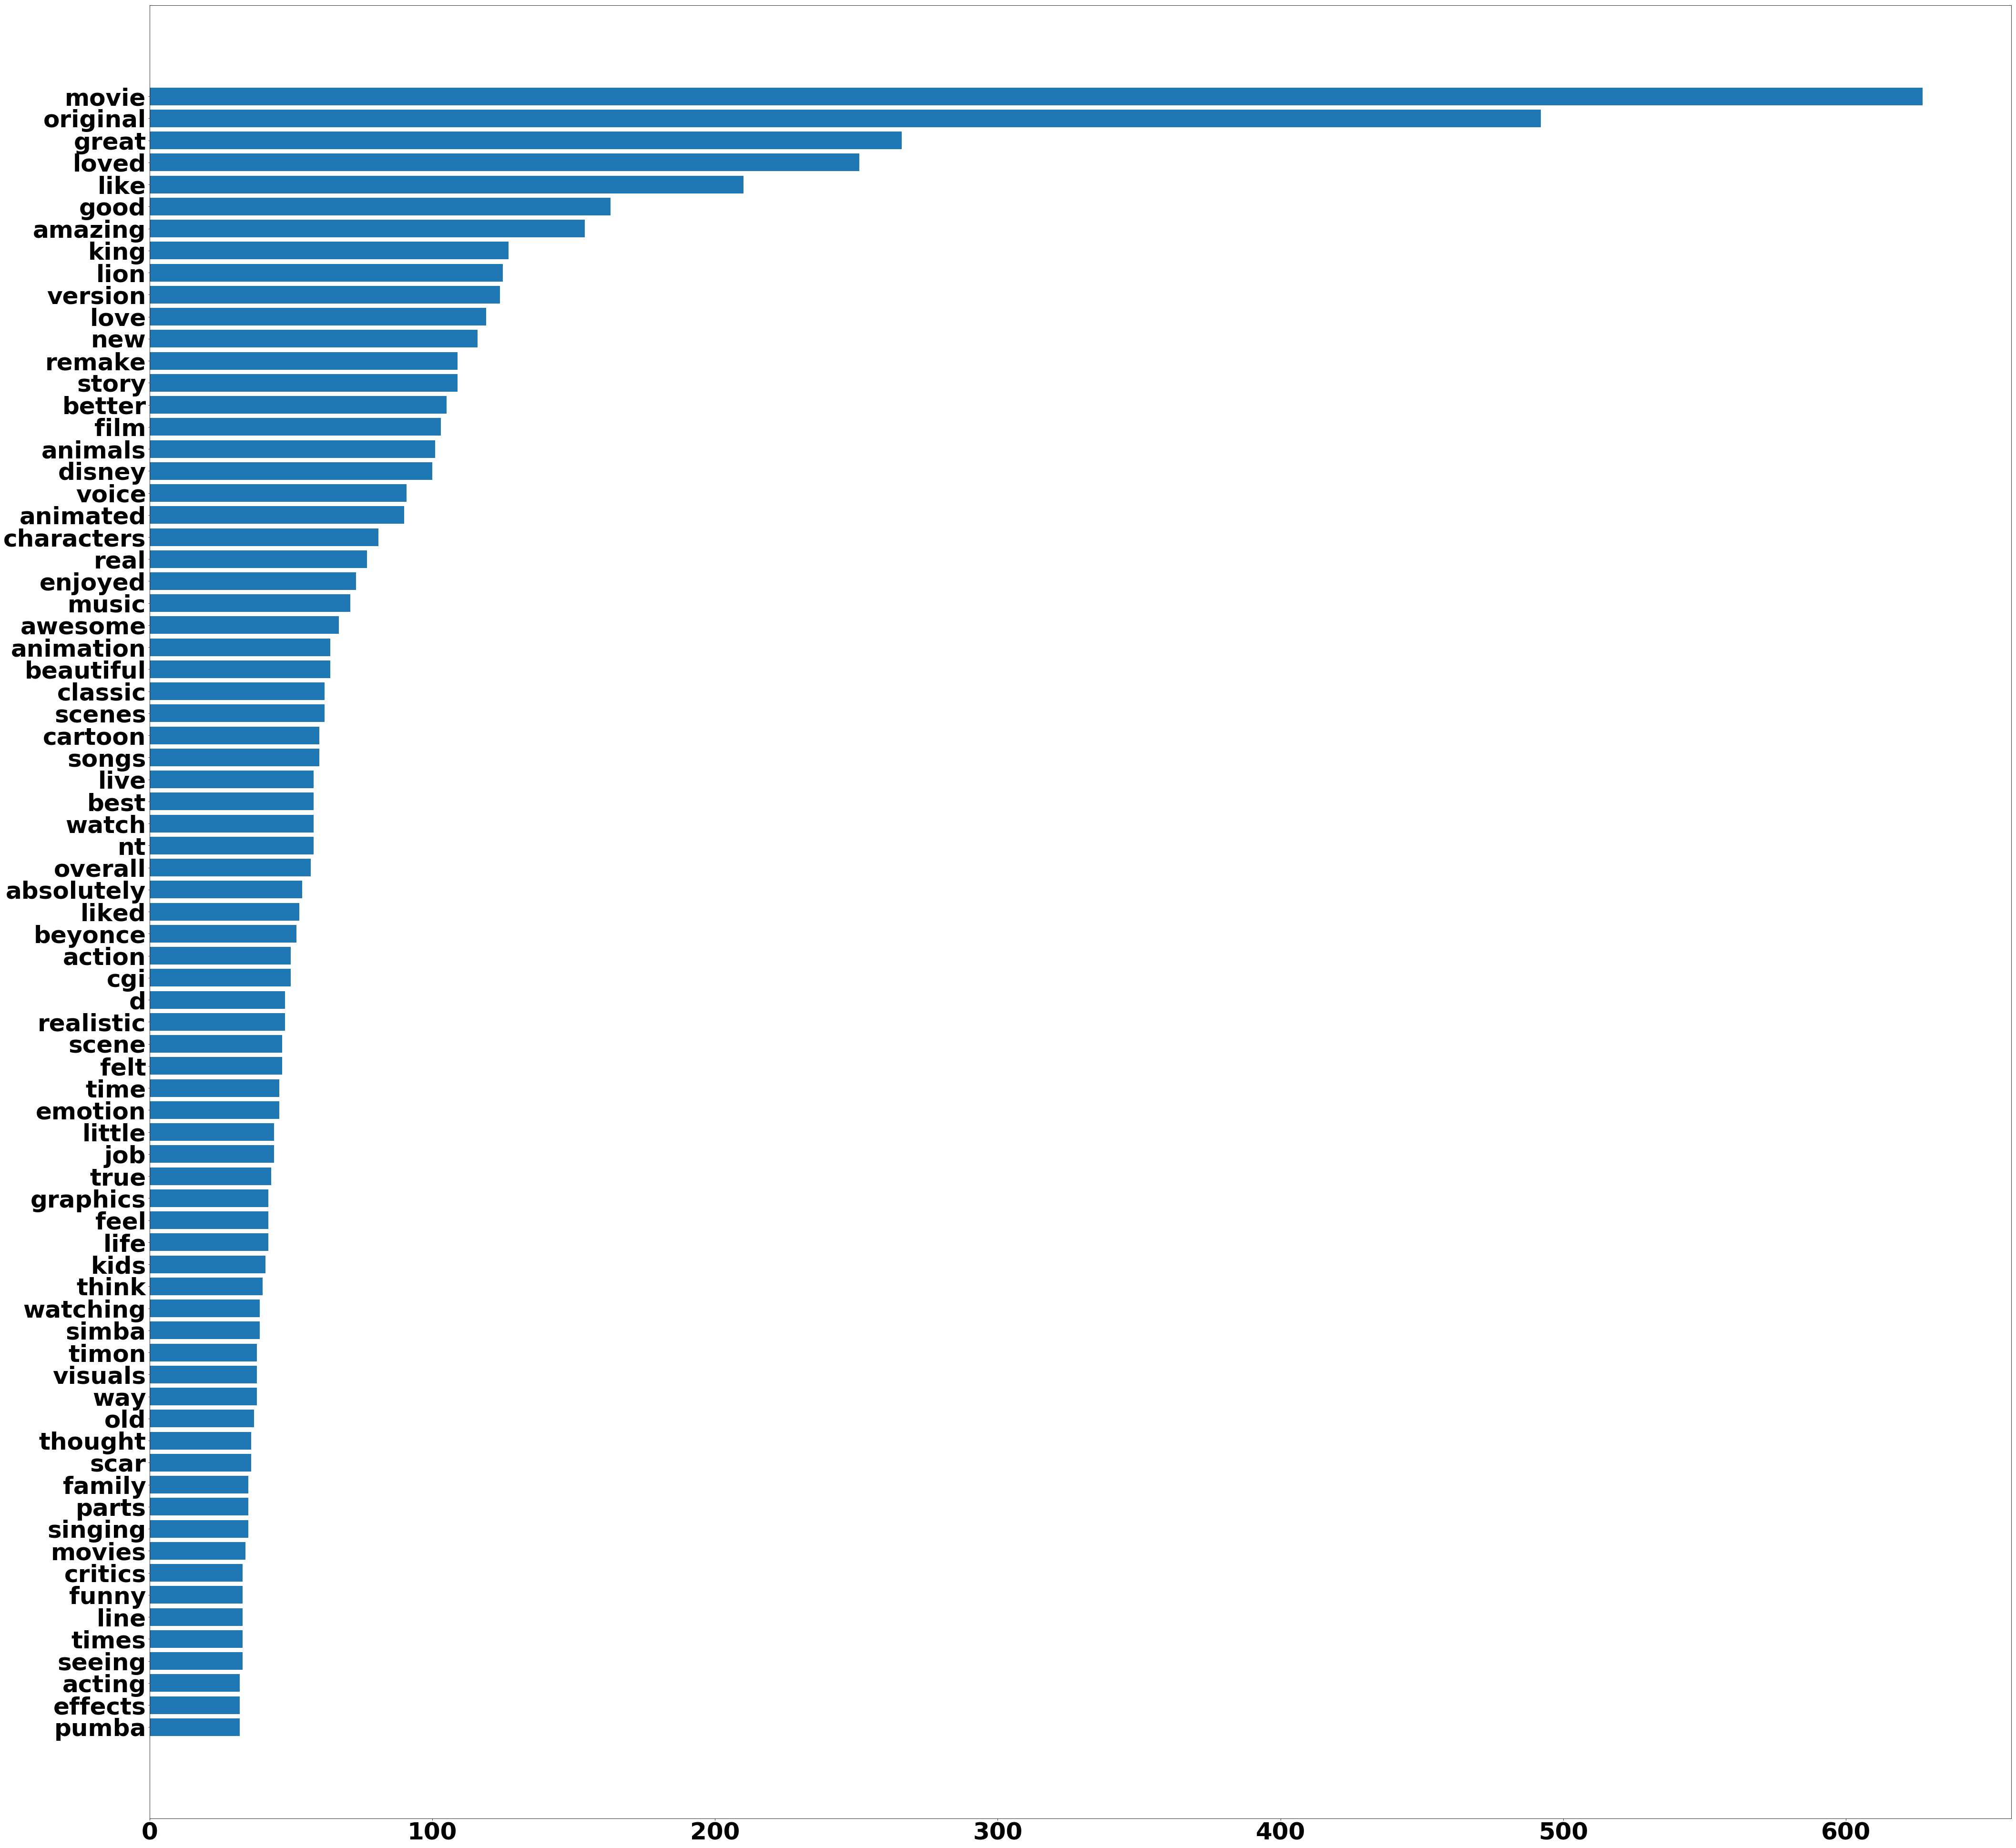

In [43]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 50}

plt.rc('font', **font)
fig = plt.figure(figsize=(70,70))
plt.barh(values[:75], counts[:75])
plt.gca().invert_yaxis()
plt.show()

#### 2.6.3 Frequency plot of words in blogs with stopwords retained

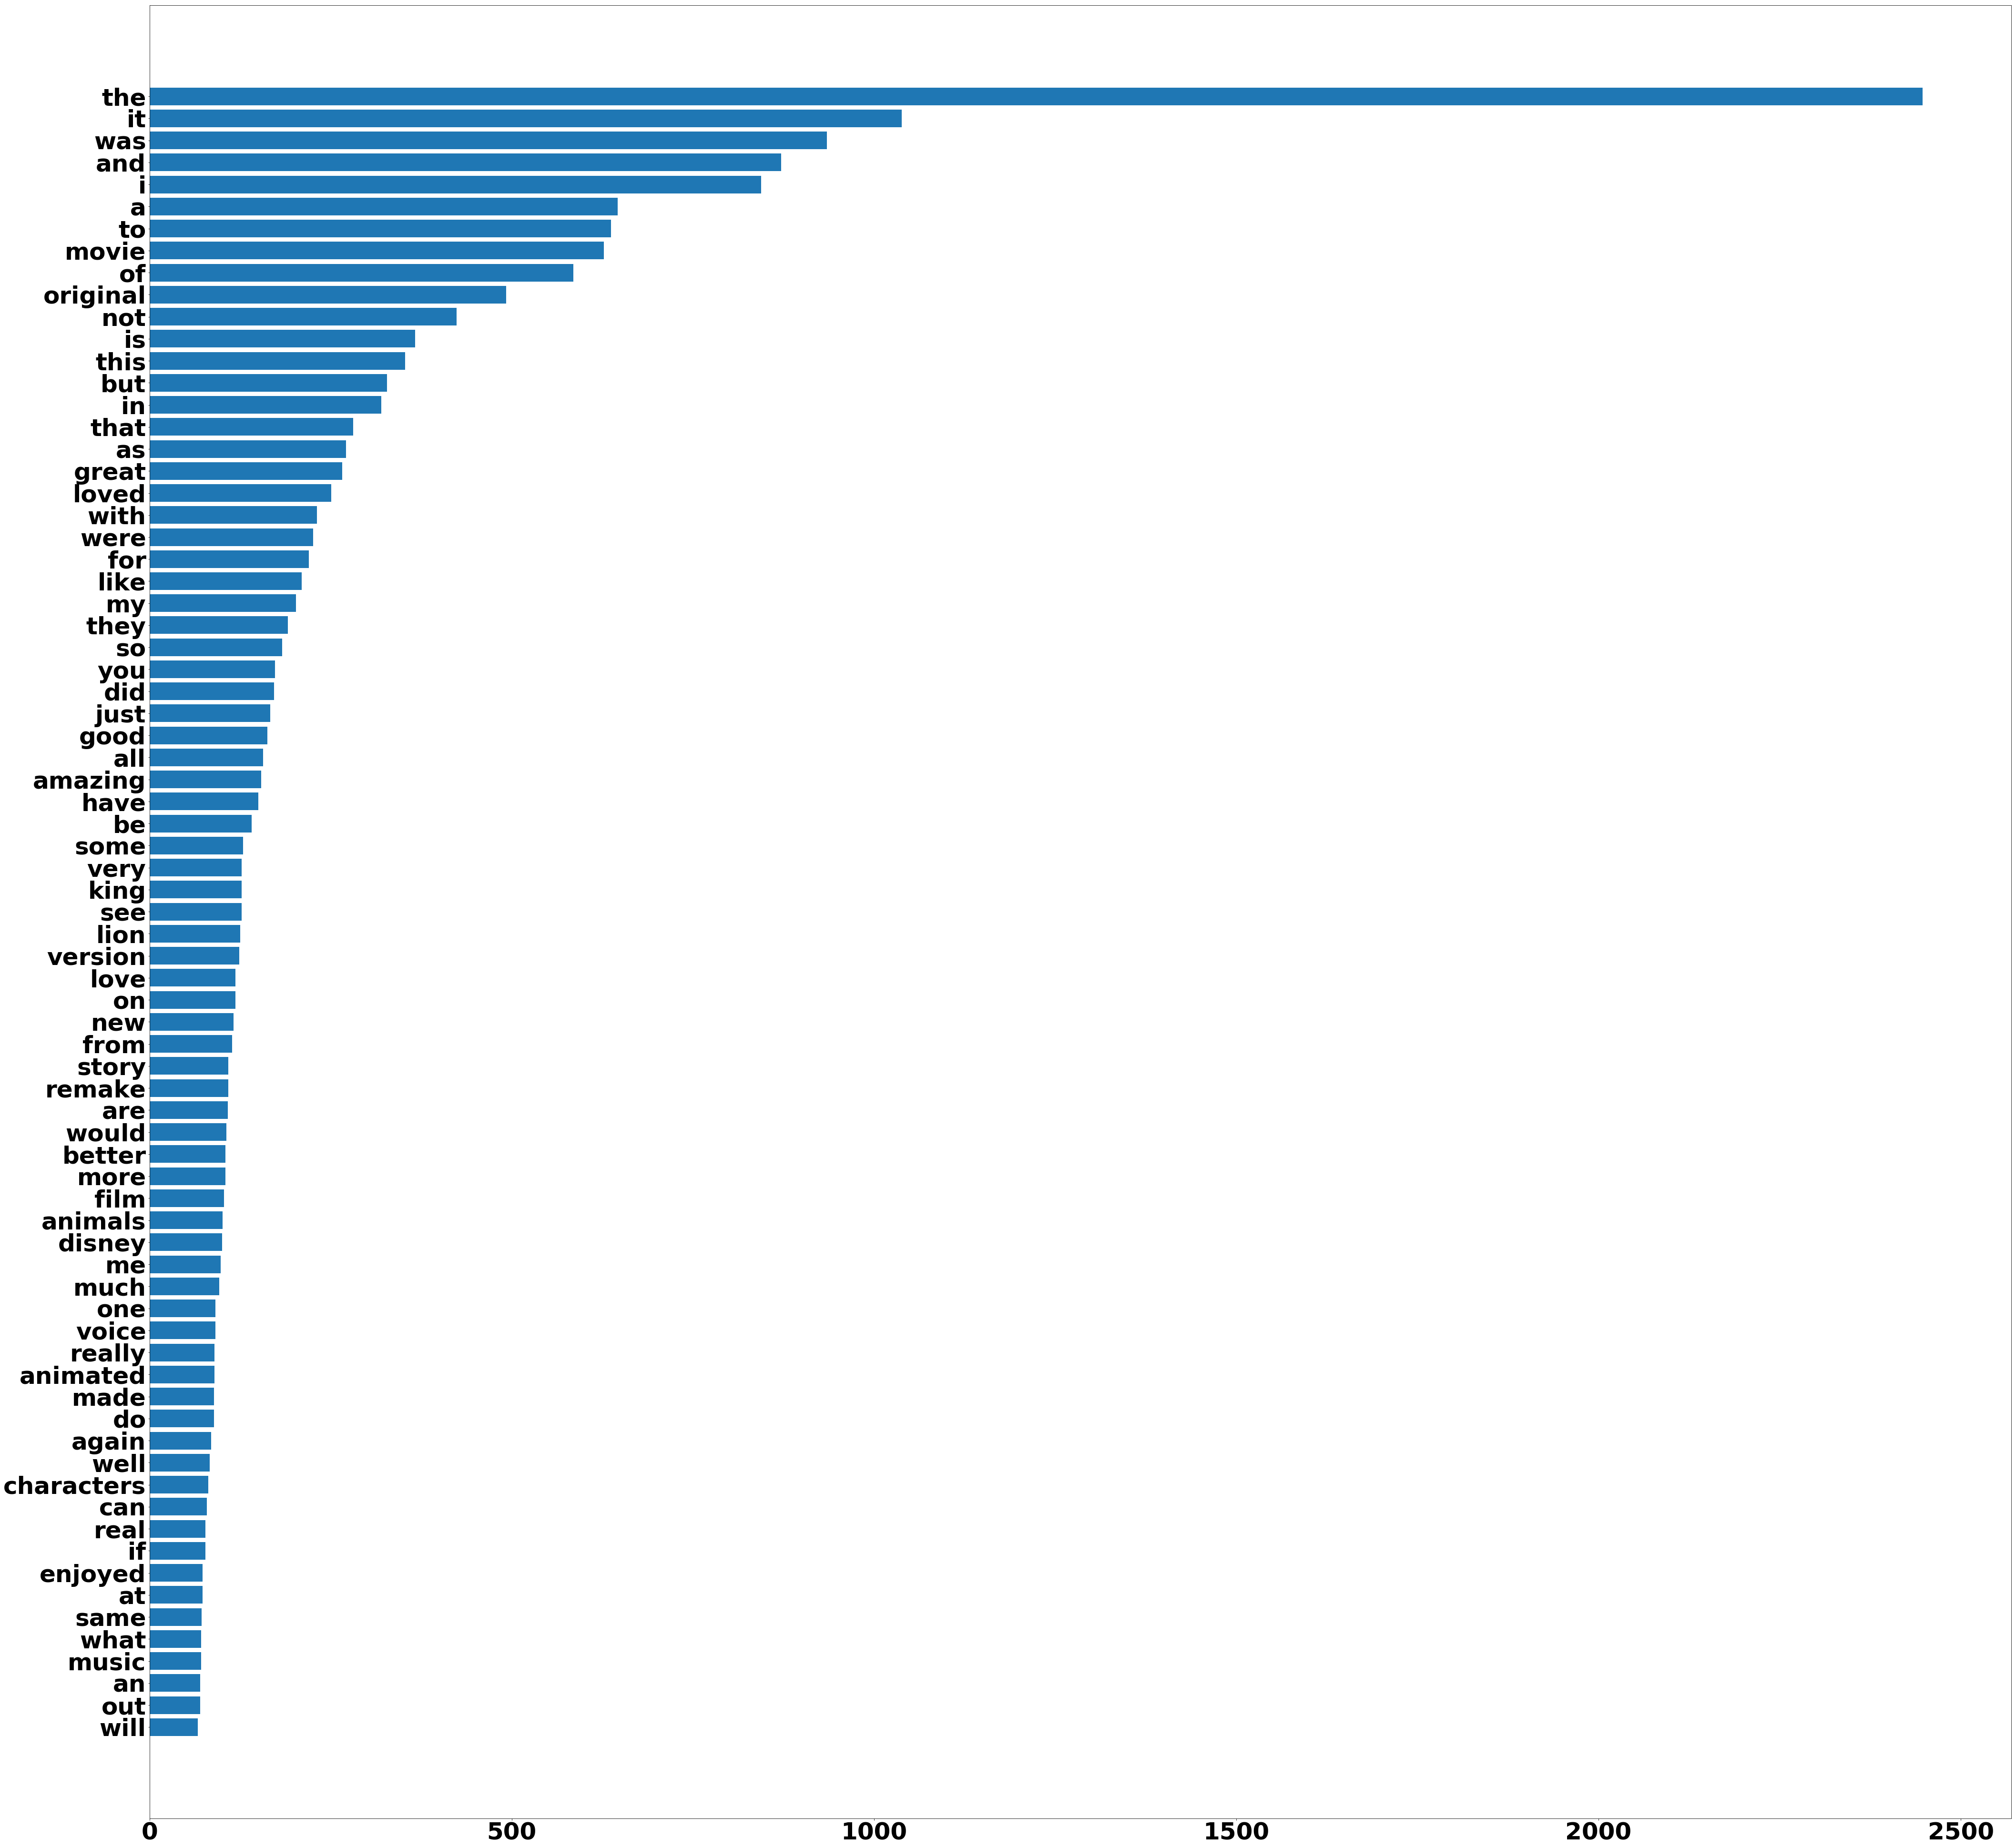

In [44]:
plt.rc('font', **font)
fig = plt.figure(figsize=(70,70))
plt.barh(all_values[:75], all_counts[:75])
plt.gca().invert_yaxis()
plt.show()

#### 2.6.4 Observations from the Frequency Plots

1) The most occuring words present in both the graphs are quite different <br>
2) The most occuring words present in graph 1 (without stopwords) makes more sense.

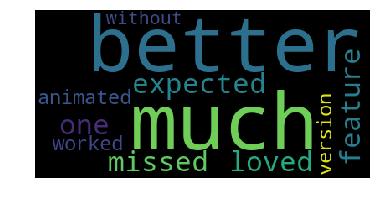

In [45]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(data['Review'][1])
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

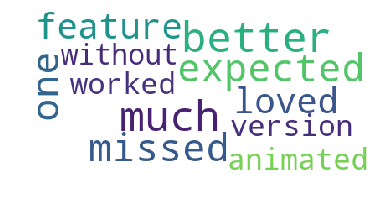

In [46]:
wordcloud = WordCloud(max_font_size=50, max_words=25, background_color="white").generate(data['Review'][1])
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 3. Exploratory Data Analysis

In [47]:
# Import library to detokenize the tokenized data

from nltk.tokenize.treebank import TreebankWordDetokenizer

In [48]:
def detokenize(corpus):
    '''Purpose : This function accepts column of data frame as input which are tokenized in the word level and 
                 converts them into the sentence level tokenization'''
    
    detokenized_data = []
    for i in range(0,len(corpus)):
        detokenized_data.append(TreebankWordDetokenizer().detokenize(corpus[i]))
        
    return detokenized_data

In [49]:
# Use below lambda function to extract only few values from dictionary

dictfilt = lambda x, y: dict([ (i,x[i]) for i in x if i in set(y) ])

In [50]:
# Create new dictionary with columns 'clean_text_lemmatized','word_count','Sentiment' 
# to understand the polarity of the sentences

temp_dict = ('clean_text_lemmatized','word_count','Sentiment')

result = dictfilt(data, temp_dict)

# print result
print(type(result))

<class 'dict'>


In [51]:
# Convert dictionary to the data frame

mv_data = pd.DataFrame(result)

In [52]:
# print head of the new data frame created

mv_data.head()

,Sentiment,word_count,clean_text_lemmatized
0,Pos,19,"[little, different, original, good]"
1,Pos,25,"[well, expect, miss, feature, love, animate, v..."
2,Pos,5,"[movie, great]"
3,Pos,6,"[absolutely, love]"
4,Pos,8,"[good, original]"


In [53]:
# De-tokenize clean_text_lemmatized column

mv_data['clean_text_lem_detokenized']=detokenize(mv_data['clean_text_lemmatized'])

In [54]:
# Print head of the column 'clean_text_lem_detokenized'

mv_data['clean_text_lem_detokenized'].head()

0                       little different original good
1    well expect miss feature love animate version ...
2                                          movie great
3                                      absolutely love
4                                        good original
Name: clean_text_lem_detokenized, dtype: object

In [55]:
# Create new columns with names polarity, review length and word count in each of the review

mv_data['polarity'] = mv_data['clean_text_lem_detokenized'].map(lambda text: TextBlob(text).sentiment.polarity)
mv_data['review_len'] =  mv_data['clean_text_lemmatized'].astype(str).apply(len)


In [56]:
# Print summary stats of word count

mv_data['word_count'].describe()

count    3000.00000
mean       36.05300
std        54.00391
min         2.00000
25%        11.00000
50%        20.00000
75%        39.00000
max       891.00000
Name: word_count, dtype: float64

In [57]:
def top_n_pos_reviews(num_reviews,pol, df,col):
    '''Purpose : This function prints specified number of top reviews 
                    num_reviews - Number of reviews to display
                    pol         - 1 indicates positive sentiment / 0 indicates negative sentiment
                    df          - input dataframe
                    col         - Text column for which sentiment analysis is needed                    
    '''
    
    print('{} random reviews with the sentiment {} polarity: \n'.format(num_reviews,pol))
    cl = df.loc[df.polarity == pol, col].sample(num_reviews).values
    for c in cl:
        print(c[0])
    

In [58]:
# Print top 10 postive reviews

top_n_pos_reviews(10,1,mv_data,['clean_text_lem_detokenized'])

10 random reviews with the sentiment 1 polarity: 

movie awesome
awesome imax bring life
wonderful
despite magnificent cgi lion king unimpressive lack roar
awesome movie take kid twice
movie wonderful
awesome wait watch
excellent excellent
awesome movie watch
animal look real beautiful scenery kid like movie


In [59]:
# Print top 10 negative reviews

top_n_pos_reviews(10,0,mv_data,['clean_text_lem_detokenized'])

10 random reviews with the sentiment 0 polarity: 

feel like character emotionless read script disney drop ball
rush not scar se prepare song quote word song wish would quit ahead
emotionless acting scar hyaena spin movie
different cartoon actually well
lion king meh take scar second song beyonc shorten song rafiki not kungfu whoopi have play shenzi
cut lot movie believe cartoon well
find voice act lack dialogue corny s counterpart deliver visual sorely miss emotion
faltou expressao nos personagen e dublagem brasileira falhou mizeravelmente ele sabiam o filmaco que e o primeiro filme e parece que nem se esforcaram na escolha de dubladore frase lidas e sem emocao
like hyena ed talk animate series talk like guest distraction song
open knowledge nature


In [60]:
# Retrieve top 10 rows of the data frame

mv_data.head(10)

,Sentiment,word_count,clean_text_lemmatized,clean_text_lem_detokenized,polarity,review_len
0,Pos,19,"[little, different, original, good]",little different original good,0.221875,43
1,Pos,25,"[well, expect, miss, feature, love, animate, v...",well expect miss feature love animate version ...,0.500000,75
2,Pos,5,"[movie, great]",movie great,0.800000,18
3,Pos,6,"[absolutely, love]",absolutely love,0.500000,22
4,Pos,8,"[good, original]",good original,0.537500,20
5,Pos,10,"[love, movie, animation, incredible]",love movie animation incredible,0.700000,44
6,Pos,6,"[love, bit]",love bit,0.500000,15
7,Pos,39,"[love, amazingly, realistic, visual, story, gr...",love amazingly realistic visual story grow lov...,0.133838,151
8,Pos,15,"[mimic, original, bring, year, old, self]",mimic original bring year old self,0.237500,53
9,Pos,61,"[visual, spectacular, expect, disney, fund, mo...",visual spectacular expect disney fund movie mi...,0.148958,271


### 3.1 The distribution of review sentiment polarity score

In [61]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Plot the graph based on the polarity of the data
mv_data['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='Polarity',
    linecolor='black',
    yTitle='Count',
    title='Sentiment Polarity Distribution')

### 3.2 The distribution of review ratings

In [62]:
# Plot the sentiment

mv_data['Sentiment'].iplot(
    kind='hist',
    xTitle='Sentiment',
    linecolor='black',
    yTitle='Count',
    title='Review Rating Distribution')

### 3.3 The distribution of review text lengths

In [63]:
mv_data['review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='Review Length',
    linecolor='black',
    yTitle='Count',
    title='Review Text Length Distribution')

### 3.4 The distribution of review word count

In [64]:
mv_data['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='Word Count',
    linecolor='black',
    yTitle='Count',
    title='Review Text Word Count Distribution')

### 3.5 The distribution of top part-of-speech tags of review corpus

In [65]:
blob = TextBlob(str(mv_data['clean_text_lem_detokenized']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='Count', 
    title='Top 20 Part-of-speech tagging for review corpus')

### 3.6 Distribution of sentiment polarity score by recommendations

In [66]:
# Convert positive sentiment to 0 and negative sentiment to 1

mv_data['Sentiment']=mv_data['Sentiment'].map({'Pos' : 0, 'Neg' : 1})
mv_data['Sentiment'].head()

0    0
1    0
2    0
3    0
4    0
Name: Sentiment, dtype: int64

In [67]:
mv_data['polarity']

0       0.221875
1       0.500000
2       0.800000
3       0.500000
4       0.537500
5       0.700000
6       0.500000
7       0.133838
8       0.237500
9       0.148958
10      0.352778
11      1.000000
12      0.270833
13      0.180556
14      0.500000
15      0.412500
16      0.400000
17      0.375000
18      0.225926
19      0.500000
20      0.500000
21      0.625000
22      0.350000
23      0.435714
24      0.316667
25      0.500000
26      0.375000
27      0.700000
28      1.000000
29      0.250000
          ...   
2970   -0.250000
2971   -0.088853
2972    0.205934
2973   -0.054167
2974    0.000000
2975    0.200000
2976   -0.068182
2977    0.166667
2978    0.206333
2979    0.081250
2980    0.850000
2981    0.000000
2982    0.268750
2983    0.437500
2984    0.000000
2985    0.058455
2986   -0.540278
2987    0.266667
2988    0.333810
2989   -0.733333
2990    0.000000
2991   -0.083327
2992   -0.041667
2993   -0.008333
2994    0.018750
2995    0.168750
2996    0.240000
2997    0.4687

In [68]:
x1 = mv_data.loc[mv_data['Sentiment'] == 1, 'polarity']
x0 = mv_data.loc[mv_data['Sentiment'] == 0, 'polarity']

trace1 = go.Histogram(
    x=x0, name='Not recommended',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'Recommended',
    opacity=0.75
)

tmp_data = [trace1, trace2]
layout = go.Layout(barmode='overlay', 
                   title='Distribution of Sentiment polarity of reviews based on Recommendation',
                   xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Polarity Score')),
                   yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='No. of people recommended')))

fig = go.Figure(data=tmp_data, layout=layout)

iplot(fig, filename='overlaid histogram')

### 3.7 Distribution of review lengths by recommendations

In [69]:
x1 = mv_data.loc[mv_data['Sentiment'] == 1, 'review_len']
x0 = mv_data.loc[mv_data['Sentiment'] == 0, 'review_len']

trace1 = go.Histogram(
    x=x0, name='Not recommended',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'Recommended',
    opacity=0.75
)

tmp_data = [trace1, trace2]
layout = go.Layout(barmode = 'group', title='Distribution of Review Lengths Based on Recommendation',
                   xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Review Count')),
                   yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Length of Review')))

fig = go.Figure(data=tmp_data, layout=layout)

iplot(fig, filename='stacked histogram')

### 3.8 The distribution of top bigrams


In [70]:
def process_text(input):
    '''Purpose : Tokenize the input column of '''
    sentence_tokens = []
    for i in range(0,len(input)):
        sentences = nltk.tokenize.sent_tokenize(input[i])
        sentence_tokens = sentence_tokens + [word_tokenize(sentence) for sentence in sentences]
    return sentence_tokens

In [71]:
input_sentence_tokens = process_text(mv_data['clean_text_lem_detokenized'])

In [72]:
def process_ngrams(input_sentence_tokens,ngram):
    ''' Purpose - Function to return N-gram based on the input sentence tokens and ngrams to consider
                  input_sentence_tokens - Sentence format converted token for which n-grams required to compute
                  ngram                 - integer value representing number of n-grams to consider'''
    
    ngram_list = []
    for sentence in input_sentence_tokens:
        ngram_sent = nltk.ngrams(sentence, ngram)
        ngram_list = ngram_list + list(ngram_sent)
    return ngram_list

In [73]:
process_ngrams(input_sentence_tokens,5)

[('well', 'expect', 'miss', 'feature', 'love'),
 ('expect', 'miss', 'feature', 'love', 'animate'),
 ('miss', 'feature', 'love', 'animate', 'version'),
 ('feature', 'love', 'animate', 'version', 'work'),
 ('love', 'amazingly', 'realistic', 'visual', 'story'),
 ('amazingly', 'realistic', 'visual', 'story', 'grow'),
 ('realistic', 'visual', 'story', 'grow', 'love'),
 ('visual', 'story', 'grow', 'love', 'unfortunately'),
 ('story', 'grow', 'love', 'unfortunately', 'plot'),
 ('grow', 'love', 'unfortunately', 'plot', 'hole'),
 ('love', 'unfortunately', 'plot', 'hole', 'character'),
 ('unfortunately', 'plot', 'hole', 'character', 'background'),
 ('plot', 'hole', 'character', 'background', 'fill'),
 ('hole', 'character', 'background', 'fill', 'ton'),
 ('character', 'background', 'fill', 'ton', 'new'),
 ('mimic', 'original', 'bring', 'year', 'old'),
 ('original', 'bring', 'year', 'old', 'self'),
 ('visual', 'spectacular', 'expect', 'disney', 'fund'),
 ('spectacular', 'expect', 'disney', 'fund',

In [74]:
mv_data.head()

,Sentiment,word_count,clean_text_lemmatized,clean_text_lem_detokenized,polarity,review_len
0,0,19,"[little, different, original, good]",little different original good,0.221875,43
1,0,25,"[well, expect, miss, feature, love, animate, v...",well expect miss feature love animate version ...,0.500000,75
2,0,5,"[movie, great]",movie great,0.800000,18
3,0,6,"[absolutely, love]",absolutely love,0.500000,22
4,0,8,"[good, original]",good original,0.537500,20


In [75]:
data.keys()

dict_keys(['index', 'Unnamed: 0', 'ReviewID', 'Reviewer Name', 'Review', 'Date-of-Review', 'Sentiment', 'word_count', 'clean_text_stemmed', 'clean_text_lemmatized', 'text_stemmed', 'text_lemmatized'])

In [76]:
# Convert 'ReviewID', 'Reviewer Name', 'Review', 'Date-of-Review', 'Sentiment' into new data frame

temp_dict = ('ReviewID', 'Reviewer Name', 'Review', 'Date-of-Review', 'Sentiment')

result = dictfilt(data, temp_dict)

print(type(result))

<class 'dict'>


In [77]:
# Convert dictionary to dataframe

mv_sent = pd.DataFrame(result)

# Print head of the dataframe

mv_sent.head()

,ReviewID,Reviewer Name,Review,Date-of-Review,Sentiment
0,FAA40F30-11D8-47BE-B4E6-C5D4189F8C15,Nicole T,a little different than the original but it w...,2019-08-24T03:42:00.737Z,Pos
1,9622568D-E6C3-4462-AE83-C6FF8B67FB84,gigglegork,so much better than i expected only missed on...,2019-08-24T03:12:25.767Z,Pos
2,e418fc29-856f-4083-afd2-66d166b79518,Lilia,the movie was great,2019-08-24T01:58:31.050Z,Pos
3,77D1F696-A953-4277-8CB0-FA3C29D35E66,Brandy L,we absolutely loved it,2019-08-24T01:17:44.386Z,Pos
4,ECB20D9E-1D80-4B1E-B76C-41A39BD1B9B1,kimberly,is not as good as the original,2019-08-24T00:57:55.430Z,Pos


In [78]:
# Extract data types of the dataframe

mv_sent.dtypes

ReviewID          object
Reviewer Name     object
Review            object
Date-of-Review    object
Sentiment         object
dtype: object

### 3.9 Analysis of sentiment based on the date of review

In [79]:
mv_sent['Date-of-Review']

0       2019-08-24T03:42:00.737Z
1       2019-08-24T03:12:25.767Z
2       2019-08-24T01:58:31.050Z
3       2019-08-24T01:17:44.386Z
4       2019-08-24T00:57:55.430Z
5       2019-08-24T00:10:50.081Z
6       2019-08-24T00:09:03.997Z
7       2019-08-23T23:37:39.847Z
8       2019-08-23T23:14:00.816Z
9       2019-08-23T22:33:11.212Z
10      2019-08-23T22:29:08.424Z
11      2019-08-23T22:12:57.167Z
12      2019-08-23T21:52:48.415Z
13      2019-08-23T20:07:30.172Z
14      2019-08-23T18:34:20.409Z
15      2019-08-23T18:07:28.523Z
16      2019-08-23T16:58:44.424Z
17      2019-08-23T16:28:55.434Z
18      2019-08-23T16:26:11.231Z
19      2019-08-23T16:17:49.483Z
20      2019-08-23T16:05:05.594Z
21      2019-08-23T16:05:02.501Z
22      2019-08-23T15:56:40.343Z
23      2019-08-23T15:25:50.291Z
24      2019-08-23T15:19:33.147Z
25      2019-08-23T15:01:55.617Z
26      2019-08-23T14:51:38.959Z
27      2019-08-23T14:26:29.014Z
28      2019-08-23T14:10:26.614Z
29      2019-08-23T13:53:29.870Z
          

In [80]:
mv_sent['Date-of-Review']=pd.to_datetime(mv_sent['Date-of-Review'])

In [81]:
mv_sent.dtypes

ReviewID                       object
Reviewer Name                  object
Review                         object
Date-of-Review    datetime64[ns, UTC]
Sentiment                      object
dtype: object

In [82]:
# Create date column

mv_sent['Date'] = mv_sent['Date-of-Review'].dt.date

In [83]:
# Create time stamp column 

mv_sent['Time_Stamp'] = mv_sent['Date-of-Review'].dt.time

In [84]:
# Create column to capture of week of day of review

mv_sent['Weekday'] = mv_sent['Date-of-Review'].dt.weekday_name

In [85]:
# Create column for Day Of Week and Is_Weekend column

mv_sent['DOW'] = mv_sent['Date-of-Review'].apply(lambda x: x.date().weekday())
mv_sent['Is_Weekend'] = mv_sent['Date-of-Review'].apply(lambda x: 1 if x.date().weekday() in (5, 6) else 0)

In [86]:
mv_sent['Weekday'].value_counts()

Monday       510
Tuesday      499
Thursday     482
Wednesday    459
Sunday       406
Friday       346
Saturday     298
Name: Weekday, dtype: int64

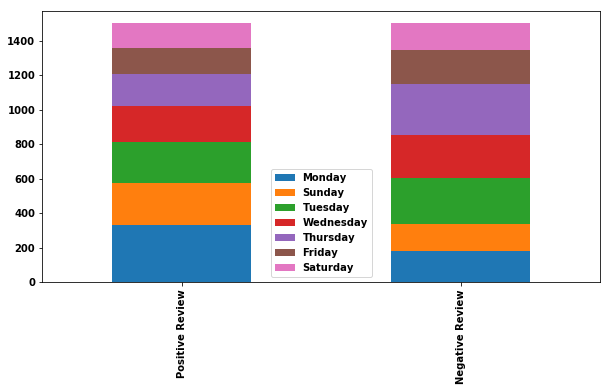

In [87]:
Pos_Review =mv_sent['Weekday'][mv_data['Sentiment']==1].value_counts()
Neg_Review =mv_sent['Weekday'][mv_data['Sentiment']==0].value_counts()

df = pd.DataFrame([Pos_Review,Neg_Review])
df.index = ['Positive Review','Negative Review']
df.plot(kind='bar',stacked=True, figsize=(10,5))

### 3.10 Identifying the user based on the user category

In [88]:
mv_sent['UserID_Len'] = mv_sent['ReviewID'].map(str).apply(len)

In [89]:
mv_sent.UserID_Len.head(10)

0    36
1    36
2    36
3    36
4    36
5    36
6    36
7    36
8    36
9    36
Name: UserID_Len, dtype: int64

In [90]:
# Retrieve row indexes of the rating > 3 and <=3

V_User= mv_sent.loc[mv_sent['UserID_Len']==9].index
UV_User =  mv_sent.loc[mv_sent['UserID_Len']==36].index

In [91]:
# Add a new column with userid len = 9 and userid len=36 to categorize the user as general public or critic respectively

mv_sent.loc[V_User,'Valid_User']= 1
mv_sent.loc[UV_User,'Valid_User'] = 0

In [92]:
mv_sent.head()

,ReviewID,Reviewer Name,Review,Date-of-Review,Sentiment,Date,Time_Stamp,Weekday,DOW,Is_Weekend,UserID_Len,Valid_User
0,FAA40F30-11D8-47BE-B4E6-C5D4189F8C15,Nicole T,a little different than the original but it w...,2019-08-24 03:42:00.737000+00:00,Pos,2019-08-24,03:42:00.737000,Saturday,5,1,36,0.0
1,9622568D-E6C3-4462-AE83-C6FF8B67FB84,gigglegork,so much better than i expected only missed on...,2019-08-24 03:12:25.767000+00:00,Pos,2019-08-24,03:12:25.767000,Saturday,5,1,36,0.0
2,e418fc29-856f-4083-afd2-66d166b79518,Lilia,the movie was great,2019-08-24 01:58:31.050000+00:00,Pos,2019-08-24,01:58:31.050000,Saturday,5,1,36,0.0
3,77D1F696-A953-4277-8CB0-FA3C29D35E66,Brandy L,we absolutely loved it,2019-08-24 01:17:44.386000+00:00,Pos,2019-08-24,01:17:44.386000,Saturday,5,1,36,0.0
4,ECB20D9E-1D80-4B1E-B76C-41A39BD1B9B1,kimberly,is not as good as the original,2019-08-24 00:57:55.430000+00:00,Pos,2019-08-24,00:57:55.430000,Saturday,5,1,36,0.0


In [93]:
mv_sent['Valid_User'].value_counts()

0.0    2206
1.0     794
Name: Valid_User, dtype: int64

# 4. Model Building

### 4.0. TF-IDF

### 4.0.1 TF-IDF on clean text 

In [94]:
## tfidf vectorizer needs sentence and not token. Hence we need to combine all the tokens back to form a string

data['clean_text_stemmed'] = [' '.join(text) for text in data['clean_text_stemmed']]
data['clean_text_lemmatized'] = [' '.join(text) for text in data['clean_text_lemmatized']]

udata['clean_text_stemmed'] = [' '.join(text) for text in udata['clean_text_stemmed']]
udata['clean_text_lemmatized'] = [' '.join(text) for text in udata['clean_text_lemmatized']]

In [95]:
print(data['clean_text_lemmatized'][0])
print(udata['clean_text_lemmatized'][0])

little different original good
good like original believe point


In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=15000,
                                 min_df=0.01,
                                 use_idf=True, ngram_range=(1,4))

# tf-idf fit transform on the train data
tfidf_matrix = tfidf_vectorizer.fit_transform(data['clean_text_lemmatized'])

# tf-idf transform on the unseen data
tfidf_matrix_unseen = tfidf_vectorizer.transform(udata['clean_text_lemmatized'])

# Print the shape of tfidf and tfidf unseen data
print(tfidf_matrix.shape)
print(tfidf_matrix_unseen.shape)

(3000, 284)
(1200, 284)


In [97]:
terms = tfidf_vectorizer.get_feature_names()

In [98]:
mat = tfidf_matrix.todense()

# Convert mat to dataframe

mat = pd.DataFrame(mat)

mat.head()

,0,1,2,3,4,5,6,7,8,9,...,274,275,276,277,278,279,280,281,282,283
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.308971,0.0,0.0,0.0,0.437006,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.873409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [99]:
# Create dense matrix for the unseen data

umat = tfidf_matrix_unseen.todense()

# Convert mat to dataframe

umat = pd.DataFrame(umat)

umat.head()
#umat.columns

,0,1,2,3,4,5,6,7,8,9,...,274,275,276,277,278,279,280,281,282,283
0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.3257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.327888,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.384323,0.0,0.366012,0.0,0.0
3,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0


In [100]:
# Convert positive sentiment to 0 and negative sentiment to 1

mv_sent['Sentiment']=mv_sent['Sentiment'].map({'Pos' : 0, 'Neg' : 1})
mv_sent['Sentiment'].head()

0    0
1    0
2    0
3    0
4    0
Name: Sentiment, dtype: int64

In [101]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(mat, mv_sent['Sentiment'], test_size=0.2, random_state=0)

In [102]:
# Caputre unseen data into variable

X_unseen = umat

X_unseen.columns

RangeIndex(start=0, stop=284, step=1)

In [103]:
# Print shape of the train and test split

print('shape of X_train, y_train', X_train.shape,y_train.shape)
print('shape of X_train, y_train', X_test.shape,y_test.shape)

shape of X_train, y_train (2400, 284) (2400,)
shape of X_train, y_train (600, 284) (600,)


### 4.0.2 TF-IDF on plain text 

In [104]:
## tfidf vectorizer needs sentence and not token. Hence we need to combine all the tokens back to form a string

data['text_lemmatized'] = [' '.join(text) for text in data['text_lemmatized']]
data['text_stemmed'] = [' '.join(text) for text in data['text_stemmed']]

udata['text_lemmatized'] = [' '.join(text) for text in udata['text_lemmatized']]
udata['text_stemmed'] = [' '.join(text) for text in udata['text_stemmed']]

In [105]:
print(data['text_lemmatized'][0])
print(udata['text_lemmatized'][0])

a little different than the original but -PRON- be very good
be good nothing like the original but i believe that be the point


In [106]:
#define vectorizer parameters
tfidf_vectorizer_plain = TfidfVectorizer(max_df=0.9, max_features=15000,
                                 min_df=0.01,
                                 use_idf=True, ngram_range=(1,4))

# tf-idf fix transform on the train data
tfidf_matrix_plain = tfidf_vectorizer_plain.fit_transform(data['text_lemmatized'])

# tf-idf transform on the unseen data
tfidf_matrix_plain_unseen = tfidf_vectorizer_plain.transform(udata['text_lemmatized'])

# Print the shape of tfidf and tfidf unseen data
print(tfidf_matrix.shape)
print(tfidf_matrix_unseen.shape)

(3000, 284)
(1200, 284)


In [107]:
mat_plain = tfidf_matrix_plain.todense()

# Convert mat to dataframe

mat_plain = pd.DataFrame(mat_plain)

mat_plain.head()

,0,1,2,3,4,5,6,7,8,9,...,717,718,719,720,721,722,723,724,725,726
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.24739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.664341,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
# Create dense matrix for the unseen data

upmat = tfidf_matrix_plain_unseen.todense()

# Convert mat to dataframe

upmat = pd.DataFrame(upmat)

upmat.head()
#umat.columns

,0,1,2,3,4,5,6,7,8,9,...,717,718,719,720,721,722,723,724,725,726
0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.20162,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.304044,0.0,0.0,0.0,0.0,0.0,0.289558,0.0,0.0,0.0
3,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [109]:
# Split the data

X_ptrain, X_ptest, y_ptrain, y_ptest = train_test_split(mat_plain, mv_sent['Sentiment'], test_size=0.2, random_state=0)

In [110]:
# Caputre unseen data into variable

X_punseen = upmat

X_punseen.columns

RangeIndex(start=0, stop=727, step=1)

In [111]:
# Print shape of the train and test split

print('shape of X_ptrain, y_ptrain', X_ptrain.shape,y_ptrain.shape)
print('shape of X_ptest, y_ptest', X_ptest.shape,y_ptest.shape)

shape of X_ptrain, y_ptrain (2400, 727) (2400,)
shape of X_ptest, y_ptest (600, 727) (600,)


### 4.1. K-mean Clustering

### 4.1.1 Fitting the elbow curve to identify right number of clusters/topics

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import joblib
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=143)
    kmeanModel.fit(tfidf_matrix)
    Sum_of_squared_distances.append(kmeanModel.inertia_)    

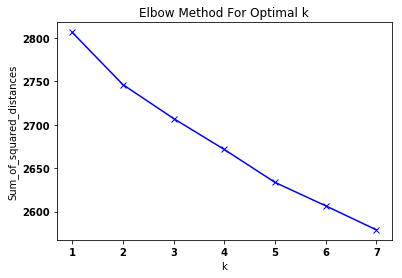

In [113]:
## Plot the elbow

## Distortion, on the y-axis, corresponds to our cost function: 
## the sum of squared difference between each data point and the centroid, i.e., the cluster centre.

## As K increases the corresponding distortion value will tend to zero, 
## because you end up having just one data point per cluster. With only one data point in per cluster, 
## the centroid is the data point itself, so the distortion will be equal to zero.

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [114]:
num_clusters = 2

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)
#km.labels_
clusters = km.labels_.tolist()
#km.cluster_centers
centers = km.cluster_centers_
print(f"the cluster centers are {centers}")

joblib.dump(km,  'doc_cluster_best_K.pkl')

the cluster centers are [[5.51451711e-03 5.53365217e-03 8.65209017e-03 1.25358816e-02
  1.14677152e-02 4.14583629e-03 1.05491200e-02 4.73064568e-03
  3.80480068e-03 2.50302027e-02 2.99652170e-02 5.04730244e-03
  2.13681755e-02 4.79872001e-03 1.02018415e-02 2.46895971e-02
  3.87850006e-03 1.55390085e-02 4.48811928e-03 1.54076611e-02
  1.94641763e-02 5.14526911e-03 3.46325465e-03 1.19363574e-02
  1.42411648e-02 6.33446954e-03 8.78650669e-03 4.17480351e-03
  8.85098031e-03 6.05844100e-03 1.08112156e-02 2.28081876e-02
  6.95745302e-03 7.70993797e-03 1.66339049e-02 1.49699971e-02
  2.25659765e-02 1.03671712e-02 5.61352598e-03 6.41573123e-03
  1.27968121e-02 4.26406218e-03 9.34598293e-03 6.67492645e-03
  3.94061804e-03 4.92008543e-03 3.73987740e-03 5.80458514e-03
  3.48846491e-03 8.30372551e-03 4.27325410e-03 1.00215565e-02
  5.23552137e-03 7.63247240e-03 5.04143528e-03 2.30529282e-02
  3.55533144e-03 3.41054857e-03 3.20147199e-03 7.88435361e-03
  1.89932589e-02 6.40031374e-03 5.84401682e-03

  3.98725563e-03 1.17251861e-02 1.16641758e-02 3.84609455e-03]]


['doc_cluster_best_K.pkl']

In [115]:
# Getting the top words from each cluster

print(km.cluster_centers_)
print(km.cluster_centers_.shape)

[[5.51451711e-03 5.53365217e-03 8.65209017e-03 1.25358816e-02
  1.14677152e-02 4.14583629e-03 1.05491200e-02 4.73064568e-03
  3.80480068e-03 2.50302027e-02 2.99652170e-02 5.04730244e-03
  2.13681755e-02 4.79872001e-03 1.02018415e-02 2.46895971e-02
  3.87850006e-03 1.55390085e-02 4.48811928e-03 1.54076611e-02
  1.94641763e-02 5.14526911e-03 3.46325465e-03 1.19363574e-02
  1.42411648e-02 6.33446954e-03 8.78650669e-03 4.17480351e-03
  8.85098031e-03 6.05844100e-03 1.08112156e-02 2.28081876e-02
  6.95745302e-03 7.70993797e-03 1.66339049e-02 1.49699971e-02
  2.25659765e-02 1.03671712e-02 5.61352598e-03 6.41573123e-03
  1.27968121e-02 4.26406218e-03 9.34598293e-03 6.67492645e-03
  3.94061804e-03 4.92008543e-03 3.73987740e-03 5.80458514e-03
  3.48846491e-03 8.30372551e-03 4.27325410e-03 1.00215565e-02
  5.23552137e-03 7.63247240e-03 5.04143528e-03 2.30529282e-02
  3.55533144e-03 3.41054857e-03 3.20147199e-03 7.88435361e-03
  1.89932589e-02 6.40031374e-03 5.84401682e-03 2.44144603e-02
  5.3352

  3.98725563e-03 1.17251861e-02 1.16641758e-02 3.84609455e-03]]
(2, 284)


#### argsort()
[1,2,3,5,4] -----> sort ---->[1,2,3,4,5]<br>
argsort------>[0,1,2,4,3] ---> index of the element in the original list

In [116]:
km.cluster_centers_.argsort()

array([[151, 120,  87,  88, 152, 256, 223, 211,  98, 189, 119, 228, 259,
        206, 226, 227, 122,  58, 156,  77, 209, 196, 231, 187, 180, 202,
        179,  78, 155,  57,  22, 224,  48, 146,  89,  56, 200, 199, 107,
        248, 221, 245,  67,  46, 131,   8, 106, 178,  16, 198, 266,  44,
        203, 176, 111, 129, 210,  68, 163,   5, 267,  27, 191,  76, 112,
        213,  41, 239,  50, 117, 214, 255, 282, 108, 258,  91, 182,  18,
        261, 192, 133, 162, 128, 188,  81,  75, 215, 204, 222, 166, 148,
          7, 238,  72,  13,  97, 137,  69,  92, 171,  66,  45, 243, 116,
         54,  11,  65, 109,  21, 230, 242, 115, 153,  52, 194, 164,  74,
         64, 276, 161, 135, 236,  79, 278,   0,  83,   1,  38, 212, 269,
        207,  47, 154,  93,  62, 113, 174, 240, 147,  29, 114, 193, 186,
        279,  82, 260,  25, 249,  61, 271,  39, 273, 190, 281, 118, 257,
        268,  43, 237, 123, 158, 280, 219, 232,  32, 121, 244, 283, 110,
        277, 170,  70, 144,  53, 250, 102,  33, 247

In [117]:
## Reversing the list so that index of max element is in 0th index
km.cluster_centers_.argsort()[:,::-1]

array([[160, 177, 100, 134, 104,  10, 265, 208, 275, 241, 262, 272,   9,
         85,  15,  63, 139,  55,  31,  36,  90,  12, 234, 125, 172, 140,
         20, 252, 145, 142, 217,  60, 169, 127, 253, 165, 220, 124, 201,
         34, 205,  17,  19,  35, 105, 141,  24, 263, 132, 103, 101,  40,
          3, 173, 246, 138, 157,  23,  71, 185, 136,   4, 195, 175, 143,
        251, 274,  30, 130, 229,   6,  37,  86,  14, 168,  51, 264, 149,
         95,  73, 216,  42,  99, 184, 254,  28, 183,  26, 225,   2,  94,
         96, 197, 167,  80,  49, 150, 233, 270, 181, 159,  84, 126, 218,
         59, 235, 247,  33, 102, 250,  53, 144,  70, 170, 277, 110, 283,
        244, 121,  32, 232, 219, 280, 158, 123, 237,  43, 268, 257, 118,
        281, 190, 273,  39, 271,  61, 249,  25, 260,  82, 279, 186, 193,
        114,  29, 147, 240, 174, 113,  62,  93, 154,  47, 207, 269, 212,
         38,   1,  83,   0, 278,  79, 236, 135, 161, 276,  64,  74, 164,
        194,  52, 153, 115, 242, 230,  21, 109,  65

In [118]:
from __future__ import print_function

print("Top terms per cluster:")

#sort cluster centers by proximity to centroid and picking the top 6 words per cluster
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
for i in range(num_clusters):
    print()
    print("Top words in Cluster-%d :" % i, end='')
    print()
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print('%s' % terms[ind].split(' '), end=',')

Top terms per cluster:

Top words in Cluster-0 :
['movie'],['original'],['good'],['like'],['great'],['animal'],
Top words in Cluster-1 :
['love'],['love', 'movie'],['movie'],['great'],['original'],['real'],

In [119]:
data['cluster_group'] = clusters
data.pop('clean_text', None)
pd.DataFrame(data).head(6)

,index,Unnamed: 0,ReviewID,Reviewer Name,Review,Date-of-Review,Sentiment,word_count,clean_text_stemmed,clean_text_lemmatized,text_stemmed,text_lemmatized,cluster_group
0,0,0,FAA40F30-11D8-47BE-B4E6-C5D4189F8C15,Nicole T,a little different than the original but it w...,2019-08-24T03:42:00.737Z,Pos,19,littl differ origin good,little different original good,a littl differ than the origin but it was veri...,a little different than the original but -PRON...,0
1,2,2,9622568D-E6C3-4462-AE83-C6FF8B67FB84,gigglegork,so much better than i expected only missed on...,2019-08-24T03:12:25.767Z,Pos,25,better expect miss featur love anim version work,well expect miss feature love animate version ...,so much better than i expect onli miss one fea...,so much well than i expect only miss one featu...,0
2,3,3,e418fc29-856f-4083-afd2-66d166b79518,Lilia,the movie was great,2019-08-24T01:58:31.050Z,Pos,5,movi great,movie great,the movi was great,the movie be great,0
3,4,4,77D1F696-A953-4277-8CB0-FA3C29D35E66,Brandy L,we absolutely loved it,2019-08-24T01:17:44.386Z,Pos,6,absolut love,absolutely love,we absolut love it,-PRON- absolutely love -PRON-,1
4,5,5,ECB20D9E-1D80-4B1E-B76C-41A39BD1B9B1,kimberly,is not as good as the original,2019-08-24T00:57:55.430Z,Pos,8,good origin,good original,is not as good as the origin,be not as good as the original,0
5,7,7,961d34f9-09a5-4e6b-9ce6-84eb369ada32,CANDICE,loved this movie the animation was incredible,2019-08-24T00:10:50.081Z,Pos,10,love movi anim incred,love movie animation incredible,love this movi the anim was incred,love this movie the animation be incredible,1


In [120]:
data.keys()

dict_keys(['index', 'Unnamed: 0', 'ReviewID', 'Reviewer Name', 'Review', 'Date-of-Review', 'Sentiment', 'word_count', 'clean_text_stemmed', 'clean_text_lemmatized', 'text_stemmed', 'text_lemmatized', 'cluster_group'])

In [121]:
cluster_df = pd.DataFrame(data)

In [122]:
cluster_df['cluster_group'].value_counts()

0    2608
1     392
Name: cluster_group, dtype: int64

#### Fetching the most frequent words among each cluster

Step 1) Tokenize the entire text <br>
Step 2) Group the tokenized text by cluster id (output is list of lists: [[],[],[]])<br>
Step 3) Unlist the array of lists for each cluster group using chain function from itertools

In [123]:
##Step 1
cluster_df['tokenized_text'] = [text.split(' ') for text in cluster_df['clean_text_lemmatized']]

In [124]:
##Step 2
grouped_text = cluster_df.groupby('cluster_group')['tokenized_text']

In [125]:
## Fetch entire tokenized text for specific group
grouped_text.get_group(1)

3                                      [absolutely, love]
5                    [love, movie, animation, incredible]
6                                             [love, bit]
7       [love, amazingly, realistic, visual, story, gr...
10      [beautiful, hard, love, expression, music, mat...
14                                          [love, movie]
16                    [love, like, lot, lifelike, animal]
19                         [movie, give, feel, kid, love]
20      [see, movie, grown, son, granddaughter, love, ...
21      [wonderful, movie, life, like, love, original,...
25                                                 [love]
34                                      [love, animation]
36                          [love, bring, childhood, day]
42      [love, think, animation, spectacular, music, w...
49                  [love, way, look, like, real, animal]
53      [love, selection, actor, choose, voice, charac...
54      [fabulous, love, scenery, naturalness, look, a...
57            

In [126]:
from itertools import chain

In [127]:
frequent_words_df = pd.DataFrame(columns={"values", "counts", "cluster_id"})

In [128]:
for num in range(num_clusters):
    values, counts = np.unique(list(chain.from_iterable(grouped_text.get_group(num))), return_counts=True)
    sorted_indices = np.argsort(-counts)
    frequent_words_df = frequent_words_df.append({"values":values[sorted_indices], "counts":counts[sorted_indices], "cluster_id": num}, ignore_index=True)

In [129]:
frequent_words_df.head()

,cluster_id,values,counts
0,0,"[movie, original, like, good, great, voice, re...","[1439, 1206, 780, 655, 447, 427, 368, 363, 363..."
1,1,"[love, movie, great, original, real, animal, l...","[434, 189, 73, 67, 42, 42, 38, 35, 30, 29, 26,..."


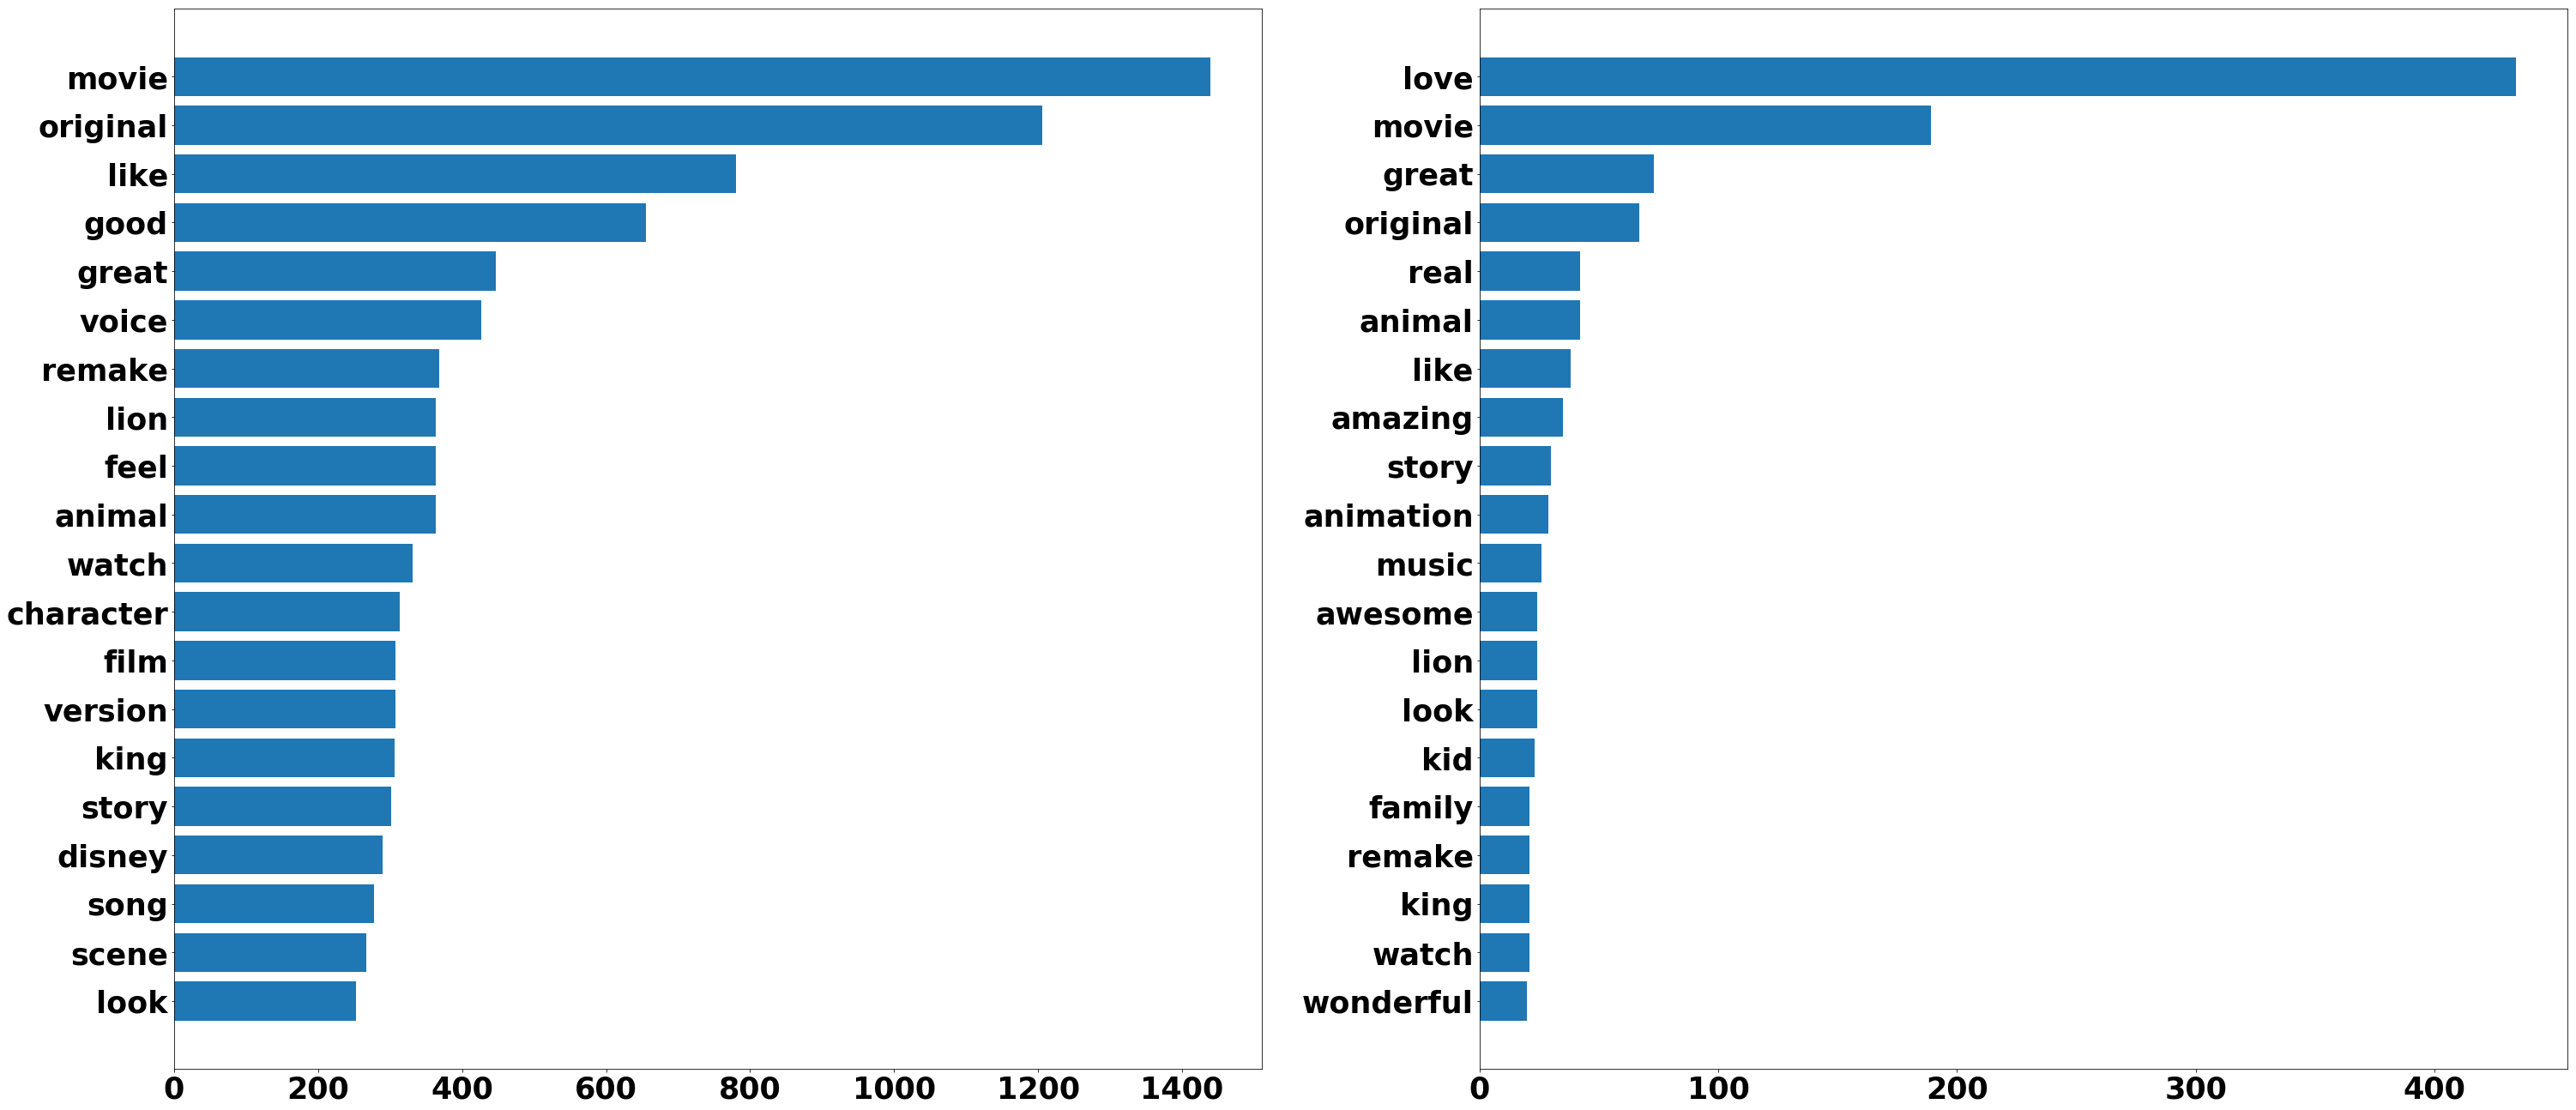

In [130]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 35}

plt.rc('font', **font)

fig = plt.figure(figsize=(50,50))
plt.subplot(2,2,1)
plt.barh(frequent_words_df.loc[0,'values'][:20], frequent_words_df.loc[0,'counts'][:20])
plt.gca().invert_yaxis()


plt.subplot(2,2,2)
plt.barh(frequent_words_df.loc[1,'values'][:20], frequent_words_df.loc[1,'counts'][:20])
plt.gca().invert_yaxis()

In [131]:
from sklearn.cluster import MiniBatchKMeans

num_clusters = 2
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(tfidf_matrix)
kmeans_clusters = kmeans.predict(tfidf_matrix)
kmeans_distances = kmeans.transform(tfidf_matrix)
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i)
    for j in sorted_centroids[i, :50]:
        print(' %s' % terms[j])
    print()

Cluster 0:
 movie
 original
 good
 like
 great
 voice
 remake
 well
 watch
 feel
 story
 version
 amazing
 enjoy
 cartoon
 lion
 character
 animation
 disney
 film
 animate
 song
 animal
 king
 not
 scene
 emotion
 think
 live
 lion king
 lack
 new
 music
 kid
 beautiful
 time
 see
 cgi
 bad
 great movie
 look
 realistic
 visual
 awesome
 change
 good movie
 little
 take
 graphic
 beyonce

Cluster 1:
 love
 movie
 love movie
 animal
 real
 great
 look
 amazing
 animation
 animal look
 original
 look real
 music
 real animal
 like
 family
 beautiful
 awesome
 kid
 wonderful
 lion
 story
 king
 realistic
 absolutely
 lion king
 good
 watch
 version
 scenery
 animate
 remake
 definitely
 see
 time
 classic
 job
 old
 take
 graphic
 new
 character
 stay
 funny
 close
 minute
 true
 feel
 life
 disney



### 4.1 Logistic Regression

In [132]:
#Model building libraries

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans

#To create confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve, auc

#To check performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#To do GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.compose import ColumnTransformer

from sklearn.svm import SVC

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot


### 4.1.1 Logistic Regression with clean lemmatized data

In [133]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Train Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_train, lr.predict(X_train))))
    print("Test Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))
    print ("Train F1 for C=%s: %s" 
           % (c, f1_score(y_train, lr.predict(X_train),average='weighted')))
    print ("Test F1 for C=%s: %s" 
           % (c, f1_score(y_test, lr.predict(X_test),average='weighted')))

Train Accuracy for C=0.01: 0.7429166666666667
Test Accuracy for C=0.01: 0.675
Train F1 for C=0.01: 0.7271418344805688
Test F1 for C=0.01: 0.6611204746461009
Train Accuracy for C=0.05: 0.7979166666666667
Test Accuracy for C=0.05: 0.7466666666666667
Train F1 for C=0.05: 0.7941642555023357
Test F1 for C=0.05: 0.7459909234046495
Train Accuracy for C=0.25: 0.825
Test Accuracy for C=0.25: 0.775
Train F1 for C=0.25: 0.8237914695435586
Test F1 for C=0.25: 0.7759069577239888
Train Accuracy for C=0.5: 0.83875
Test Accuracy for C=0.5: 0.7883333333333333
Train F1 for C=0.5: 0.837927749180284
Test F1 for C=0.5: 0.789386430678466
Train Accuracy for C=1: 0.8475
Test Accuracy for C=1: 0.7866666666666666
Train F1 for C=1: 0.8470640359225993
Test F1 for C=1: 0.7877519085814582


In [134]:
# Call the logistic regression with best hyperparamer

log_reg = LogisticRegression(C=1)

log_reg.fit(X_train, y_train)

y_unseen = log_reg.predict(X_unseen)

# Export data into csv file

pd.DataFrame(y_unseen).to_csv("LR_clean_stem_output.csv")

In [135]:
# Print the train/ test accuracy

print('Train accuracy',accuracy_score(y_train,log_reg.predict(X_train)))
print('Test accuracy',accuracy_score(y_test,log_reg.predict(X_test)))


Train accuracy 0.8475
Test accuracy 0.7866666666666666


In [136]:
# Print F1 scores

print('Train F1 score',f1_score(y_train,log_reg.predict(X_train),average='weighted'))
print('Test F1 score',f1_score(y_test,log_reg.predict(X_test),average='weighted'))

Train F1 score 0.8470640359225993
Test F1 score 0.7877519085814582


f1=0.772 auc=0.833 ap=0.834


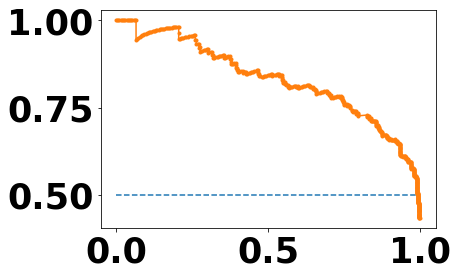

In [137]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot

# predict probabilities
probs = lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = lr.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

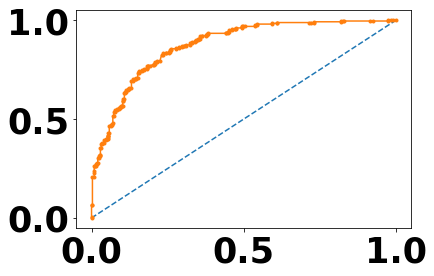

In [138]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

### 4.1.2 Logistic Regression with plain data

In [139]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(C=c)
    lr.fit(X_ptrain, y_ptrain)
    print ("Train Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_ptrain, lr.predict(X_ptrain))))
    print("Test Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_ptest, lr.predict(X_ptest))))
    print ("Train F1 for C=%s: %s" 
           % (c, f1_score(y_ptrain, lr.predict(X_ptrain),average='weighted')))
    print ("Test F1 for C=%s: %s" 
           % (c, f1_score(y_ptest, lr.predict(X_ptest),average='weighted')))

Train Accuracy for C=0.01: 0.7466666666666667
Test Accuracy for C=0.01: 0.6733333333333333
Train F1 for C=0.01: 0.7296355452851969
Test F1 for C=0.01: 0.6570625798212005
Train Accuracy for C=0.05: 0.8225
Test Accuracy for C=0.05: 0.7766666666666666
Train F1 for C=0.05: 0.8203238316354455
Test F1 for C=0.05: 0.7770538466097675
Train Accuracy for C=0.25: 0.8575
Test Accuracy for C=0.25: 0.8016666666666666
Train F1 for C=0.25: 0.8566541165221683
Test F1 for C=0.25: 0.8026807985962916
Train Accuracy for C=0.5: 0.8725
Test Accuracy for C=0.5: 0.8
Train F1 for C=0.5: 0.871934040683355
Test F1 for C=0.5: 0.8010282661421019
Train Accuracy for C=1: 0.8841666666666667
Test Accuracy for C=1: 0.8116666666666666
Train F1 for C=1: 0.8838355245532311
Test F1 for C=1: 0.8125661927772718


In [140]:
# Call the logistic regression with best hyperparamer

log_reg = LogisticRegression(C=1)

log_reg.fit(X_ptrain, y_ptrain)

test_predict = log_reg.predict(X_ptest)

y_punseen = log_reg.predict(X_punseen)

# Export data into csv file

pd.DataFrame(y_punseen).to_csv("LR_plain_stem_output.csv")

f1=0.793 auc=0.857 ap=0.858


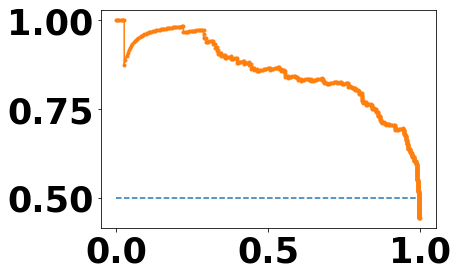

In [141]:
from sklearn.metrics import auc

# predict probabilities
probs = log_reg.predict_proba(X_ptest)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = log_reg.predict(X_ptest)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)
# calculate F1 score
f1 = f1_score(y_ptest, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_ptest, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

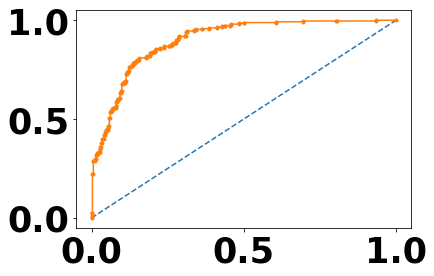

In [142]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_ptest, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [143]:
# Print train/test accuracy

print('Train accuracy',accuracy_score(y_ptrain,log_reg.predict(X_ptrain)))
print('Test accuracy',accuracy_score(y_ptest,log_reg.predict(X_ptest)))
# Print train/test F1 score

Train accuracy 0.8841666666666667
Test accuracy 0.8116666666666666


In [144]:


print('Train F1 score',f1_score(y_ptrain,log_reg.predict(X_ptrain),average='weighted'))
print('Test F1 score',f1_score(y_ptest,log_reg.predict(X_ptest),average='weighted'))

Train F1 score 0.8838355245532311
Test F1 score 0.8125661927772718


### 4.2 Naive Bayes

In [145]:
# Import libraries for Naive Bayes

from sklearn.naive_bayes import MultinomialNB

In [146]:
# Create Navive Bayes object

nb_reg = MultinomialNB()

nb_reg.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [147]:
# Predict on train and test

train_pred = nb_reg.predict(X_train)
test_pred  = nb_reg.predict(X_test)

# Train/Test data confusion Matrix
print(confusion_matrix(y_train,train_pred))

print(confusion_matrix(y_test,test_pred))

[[ 897  260]
 [ 169 1074]]
[[262  81]
 [ 37 220]]


In [148]:
print('Train accuracy',accuracy_score(y_train,train_pred))
print('Test accuracy',accuracy_score(y_test,test_pred))

Train accuracy 0.82125
Test accuracy 0.8033333333333333


In [149]:
print('Train F1 score',f1_score(y_train,train_pred,average='weighted'))
print('Test F1 score',f1_score(y_test,test_pred,average='weighted'))

Train F1 score 0.8207474181184432
Test F1 score 0.804347860069898


### 4.3 SVM

In [150]:
# Import libraries for SVC 

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

### 4.3.1 SVC with clean lemmatized data

In [151]:
# Call the SVC object with multiple hyperparameters

for c in [0.01, 0.025, 0.05, 0.1,0.25, 0.5, 1]:
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Train Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_train, svm.predict(X_train))))
    print("Test Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, svm.predict(X_test))))
    print ("Train F1 for C=%s: %s" 
           % (c, f1_score(y_train, svm.predict(X_train),average='weighted')))
    print ("Test F1 for C=%s: %s" 
           % (c, f1_score(y_test, svm.predict(X_test),average='weighted')))

Train Accuracy for C=0.01: 0.8091666666666667
Test Accuracy for C=0.01: 0.76
Train F1 for C=0.01: 0.8064868238053722
Test F1 for C=0.01: 0.76
Train Accuracy for C=0.025: 0.82625
Test Accuracy for C=0.025: 0.7733333333333333
Train F1 for C=0.025: 0.8248824737362326
Test F1 for C=0.025: 0.7742210453313157
Train Accuracy for C=0.05: 0.8375
Test Accuracy for C=0.05: 0.7866666666666666
Train F1 for C=0.05: 0.8366202530936154
Test F1 for C=0.05: 0.7876935876864563
Train Accuracy for C=0.1: 0.8483333333333334
Test Accuracy for C=0.1: 0.7866666666666666
Train F1 for C=0.1: 0.8478706168365907
Test F1 for C=0.1: 0.7877371872072794
Train Accuracy for C=0.25: 0.8520833333333333
Test Accuracy for C=0.25: 0.7883333333333333
Train F1 for C=0.25: 0.8518075356267534
Test F1 for C=0.25: 0.7894242614707732
Train Accuracy for C=0.5: 0.8533333333333334
Test Accuracy for C=0.5: 0.785
Train F1 for C=0.5: 0.8531301405359549
Test F1 for C=0.5: 0.7861081081081082
Train Accuracy for C=1: 0.85625
Test Accuracy fo

In [152]:
# Call the SVC with best hyperparamer

lin_svm = LinearSVC(C=0.25)

lin_svm.fit(X_train, y_train)

y_unseen = lin_svm.predict(X_unseen)

# Export data into csv file

pd.DataFrame(y_unseen).to_csv("LR_clean_stem_output.csv")

In [153]:
# Print train/test accuray

print('Train accuracy',accuracy_score(y_train,lin_svm.predict(X_train)))
print('Test accuracy',accuracy_score(y_test,lin_svm.predict(X_test)))

Train accuracy 0.8520833333333333
Test accuracy 0.7883333333333333


In [154]:
# Print train/test F1 score

print('Train F1 score',f1_score(y_train,lin_svm.predict(X_train),average='weighted'))
print('Test F1 score',f1_score(y_test,lin_svm.predict(X_test),average='weighted'))

Train F1 score 0.8518075356267534
Test F1 score 0.7894242614707732


### 4.3.2 SVM with plain data

In [155]:
# Call the SVC object with multiple hyperparameters

for c in [0.01, 0.025, 0.05, 0.1,0.25, 0.5, 1]:
    lin_psvm = LinearSVC(C=c)
    lin_psvm.fit(X_ptrain, y_ptrain)
    print ("Train Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_ptrain, lin_psvm.predict(X_ptrain))))
    print("Test Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_ptest, lin_psvm.predict(X_ptest))))
    print ("Train F1 for C=%s: %s" 
           % (c, f1_score(y_ptrain, lin_psvm.predict(X_ptrain),average='weighted')))
    print ("Test F1 for C=%s: %s" 
           % (c, f1_score(y_ptest, lin_psvm.predict(X_ptest),average='weighted')))

Train Accuracy for C=0.01: 0.8391666666666666
Test Accuracy for C=0.01: 0.7933333333333333
Train F1 for C=0.01: 0.8376827889111276
Test F1 for C=0.01: 0.794300194931774
Train Accuracy for C=0.025: 0.8541666666666666
Test Accuracy for C=0.025: 0.7983333333333333
Train F1 for C=0.025: 0.8531804019228375
Test F1 for C=0.025: 0.7993645094970696
Train Accuracy for C=0.05: 0.8691666666666666
Test Accuracy for C=0.05: 0.8
Train F1 for C=0.05: 0.8685236456968107
Test F1 for C=0.05: 0.8010282661421019
Train Accuracy for C=0.1: 0.8845833333333334
Test Accuracy for C=0.1: 0.81
Train F1 for C=0.1: 0.8841789175796684
Test F1 for C=0.1: 0.8109401728538802
Train Accuracy for C=0.25: 0.90125
Test Accuracy for C=0.25: 0.8216666666666667
Train F1 for C=0.25: 0.9010580734291591
Test F1 for C=0.25: 0.8224634965691403
Train Accuracy for C=0.5: 0.9116666666666666
Test Accuracy for C=0.5: 0.82
Train F1 for C=0.5: 0.9115442891864274
Test F1 for C=0.5: 0.8207121021399028
Train Accuracy for C=1: 0.9195833333333

In [156]:
# Call the SVM with best hyperparamer

lin_psvm = LinearSVC(C=0.25)

lin_psvm.fit(X_ptrain, y_ptrain)

y_punseen = lin_psvm.predict(X_punseen)

# Export data into csv file

pd.DataFrame(y_punseen).to_csv("SVM_plain_stem_output.csv")

In [157]:
# Print train/test accuray

print('Train accuracy',accuracy_score(y_ptrain,lin_psvm.predict(X_ptrain)))
print('Test accuracy',accuracy_score(y_ptest,lin_psvm.predict(X_ptest)))


Train accuracy 0.90125
Test accuracy 0.8216666666666667


In [158]:
# Print train/test F1 score

print('Train F1 score',f1_score(y_ptrain,lin_psvm.predict(X_ptrain),average='weighted'))
print('Test F1 score',f1_score(y_ptest,lin_psvm.predict(X_ptest),average='weighted'))

Train F1 score 0.9010580734291591
Test F1 score 0.8224634965691403


### 4.4 Random Forest

In [159]:
from sklearn.model_selection import RandomizedSearchCV

### 4.4.1 Random Forest with clean lemmatized data

In [160]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [161]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [162]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

In [163]:
y_unseen = rf_random.predict(X_unseen)

# Export data into csv file

pd.DataFrame(y_unseen).to_csv("Random_Forest.csv")

In [164]:
rf_clf = RandomForestClassifier(n_estimators=200,
                                min_impurity_split=5,
                                min_samples_leaf=4,
                                max_features='auto',
                                max_depth=80,
                                bootstrap=True)
rf_clf.fit(X_train,y_train)
train_predict = rf_clf.predict(X_train)
test_predict = rf_clf.predict(X_test)
unseen_predict = rf_clf.predict(X_unseen)

y_unseen = rf_clf.predict(X_unseen)

# Export data into csv file

pd.DataFrame(y_unseen).to_csv("Random_Forest.csv")

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its 

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its 

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its 

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its 

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its 

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its 

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its 

In [165]:
print('Train accuracy',accuracy_score(y_train,rf_clf.predict(X_train)))
print('Test accuracy',accuracy_score(y_test,rf_clf.predict(X_test)))

Train accuracy 0.5179166666666667
Test accuracy 0.42833333333333334


In [166]:
print('Train F1 score',f1_score(y_train,rf_clf.predict(X_train),average='weighted'))
print('Test F1 score',f1_score(y_test,rf_clf.predict(X_test),average='weighted'))

Train F1 score 0.3534287217494739
Test F1 score 0.2569000388953715


### 4.4.2 Random Forest with Plain data


In [167]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_ptrain, y_ptrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 22.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [168]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [169]:
y_unseen=rf_random.predict(X_punseen)

# Export data into csv file

pd.DataFrame(y_unseen).to_csv("Random_Forest_Plain.csv")

In [170]:
rf_clf = RandomForestClassifier(n_estimators=400,
                                min_impurity_split=10,
                                min_samples_leaf=2,
                                max_features='sqrt',
                                max_depth=90,
                                bootstrap=False)
rf_clf.fit(X_ptrain,y_ptrain)
train_predict = rf_clf.predict(X_ptrain)
test_predict = rf_clf.predict(X_ptest)
unseen_predict = rf_clf.predict(X_punseen)

y_unseen = rf_clf.predict(X_punseen)

# Export data into csv file

pd.DataFrame(y_unseen).to_csv("Random_Forest_Plain.csv")

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its 

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its 

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its 

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its 

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its 

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its 

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its 

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its 

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its 

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its 

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its 

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its 

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its 

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning:

The min_impurity_split parameter is deprecated. Its 

In [171]:
print('Train accuracy',accuracy_score(y_ptrain,rf_clf.predict(X_ptrain)))
print('Test accuracy',accuracy_score(y_ptest,rf_clf.predict(X_ptest)))

Train accuracy 0.5179166666666667
Test accuracy 0.42833333333333334


In [172]:
print('Train F1 score',f1_score(y_ptrain,rf_clf.predict(X_ptrain),average='weighted'))
print('Test F1 score',f1_score(y_ptest,rf_clf.predict(X_ptest),average='weighted'))

Train F1 score 0.3534287217494739
Test F1 score 0.2569000388953715


### 4.5. XGB boost

In [173]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [174]:
from xgboost import XGBClassifier

In [175]:
xgb_clf = XGBClassifier(max_depth=3,n_estimators=1000,learning_rate=0.20,alpha=1)
xgb_clf.fit(X_train,y_train)


XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.2,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [176]:
# train_predict = xgb_clf.predict(X_train)
# test_predict = xgb_clf.predict(X_test)
unseen_predict = xgb_clf.predict(X_unseen)

print('Train accuracy',accuracy_score(y_train,xgb_clf.predict(X_train)))
print('Test accuracy',accuracy_score(y_test,xgb_clf.predict(X_test)))

print('Train F1 score',f1_score(y_train,xgb_clf.predict(X_train),average='weighted'))
print('Test F1 score',f1_score(y_test,xgb_clf.predict(X_test),average='weighted'))

Train accuracy 0.96875
Test accuracy 0.7866666666666666
Train F1 score 0.9687404826876446
Test F1 score 0.7877222993447077


### 4.6. Deep Learning Models

In [177]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout




Using TensorFlow backend.


In [178]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 2000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 500
# This is fixed.
EMBEDDING_DIM = 100

In [179]:
# Create new dictionary with columns 'clean_text_lemmatized','word_count','Sentiment' 
# to understand the polarity of the sentences

temp_dict = ('Review','Sentiment')

result = dictfilt(data, temp_dict)

# print result
print(type(result))

<class 'dict'>


In [180]:
mv_data_sent = pd.DataFrame(result)
mv_data_sent['Sentiment'] = mv_data_sent['Sentiment'].map({'Pos': 0, 'Neg': 1})
mv_data_sent.head()

,Review,Sentiment
0,a little different than the original but it w...,0
1,so much better than i expected only missed on...,0
2,the movie was great,0
3,we absolutely loved it,0
4,is not as good as the original,0


### 4.6.1 LSTM with clean lemmatized data

In [181]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(mv_data_sent['Review'].values)
word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))
#Tokenizing text data and Padding sequence
X = tokenizer.texts_to_sequences(mv_data_sent['Review'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
Y = pd.get_dummies(mv_data_sent['Sentiment'].values)
print('Shape of label tensor:', Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 432)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

Found 5203 unique tokens.
Shape of data tensor: (3000, 500)
Shape of label tensor: (3000, 2)
(2100, 500) (2100, 2)
(900, 500) (900, 2)


In [182]:
#Building Model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(LSTM(100, activation='tanh',dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Fitting model

%time
epochs = 3
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2)

#Model Evaluation 
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

W1201 12:59:45.369583 17848 deprecation_wrapper.py:119] From C:\Users\Aaradhya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1201 12:59:45.387495 17848 deprecation_wrapper.py:119] From C:\Users\Aaradhya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1201 12:59:45.390488 17848 deprecation_wrapper.py:119] From C:\Users\Aaradhya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1201 12:59:45.501333 17848 deprecation_wrapper.py:119] From C:\Users\Aaradhya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1201 12:59:45.508315 17848 deprec

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          200000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 280,602
Trainable params: 280,602
Non-trainable params: 0
_________________________________________________________________
None
Wall time: 0 ns
Train on 1680 samples, validate on 420 samples
Epoch 1/3
1680/1680 [==============================] - ETA: 42s - loss: 0.6917 - acc: 0.56 - ETA: 31s - loss: 0.6900 - acc: 0.61 - ETA: 29s - loss: 0.6893 - acc: 0.60 - ETA: 27s - loss: 0.6889 - acc: 0.57 - ETA: 26s - loss: 0.6899 - acc: 0.54 - ETA: 25s - loss: 0.6881 - acc: 0.54 - ETA: 24s - loss: 0.6879 - acc: 0.54 - ETA: 23s - 

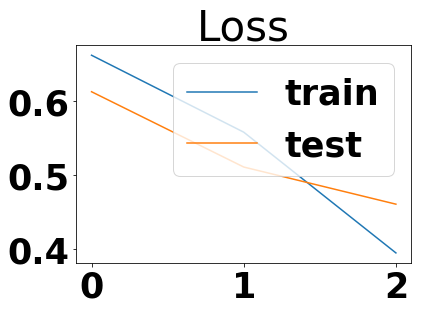

In [183]:

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

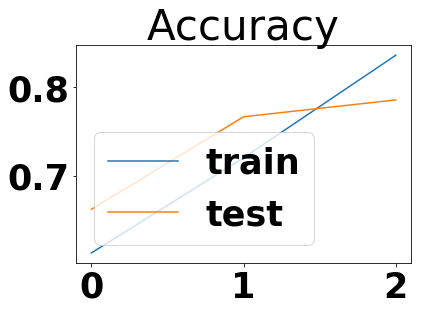

In [184]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();


In [185]:
# Create new dictionary with columns 'clean_text_lemmatized','word_count','Sentiment' 
# to understand the polarity of the sentences

unseen_lstm = pd.read_csv('test.csv')

In [186]:
unseen_lstm.head()

,ReviewID,review
0,92876,Was good. Nothing like the original but I beli...
1,92877,I absolutely loved it! A wonderful rendition o...
2,92878,I love the movie! Good job director! \nI appre...
3,92879,"GREAT MOVIE!! Same as the original, but the c..."
4,92880,Realistic. Fantastic special effects


In [187]:
#Tokenizing text data and Padding sequence
X = tokenizer.texts_to_sequences(unseen_lstm['review'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (1200, 500)


In [188]:
seq = tokenizer.texts_to_sequences(unseen_lstm['review'])
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred_unseen = model.predict(padded)



In [189]:
pred_unseen.shape

(1200, 2)

In [190]:
#Getting max of Levels
labels = ['0','1']
lstm_output = []
i=0
for i in range(0,1199):
    lstm_output.append(labels[np.argmax(pred_unseen[i])])
lstm_OUT = pd.DataFrame(lstm_output)

#Exporting LSTM model output to CSV file. 
lstm_OUT.to_csv("lstm.csv")

### 4.6.2 LSTM with plain data

In [191]:
# Create new dictionary with columns 'clean_text_lemmatized','word_count','Sentiment' 
# to understand the polarity of the sentences

temp_dict = ('clean_text_lemmatized','Sentiment')

result = dictfilt(data, temp_dict)

# print result
print(type(result))

<class 'dict'>


In [192]:
mv_data_sent = pd.DataFrame(result)
mv_data_sent['Sentiment'] = mv_data_sent['Sentiment'].map({'Pos': 0, 'Neg': 1})
mv_data_sent.head()

,Sentiment,clean_text_lemmatized
0,0,little different original good
1,0,well expect miss feature love animate version ...
2,0,movie great
3,0,absolutely love
4,0,good original


In [193]:
data.keys()

dict_keys(['index', 'Unnamed: 0', 'ReviewID', 'Reviewer Name', 'Review', 'Date-of-Review', 'Sentiment', 'word_count', 'clean_text_stemmed', 'clean_text_lemmatized', 'text_stemmed', 'text_lemmatized', 'cluster_group'])

In [194]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(mv_data_sent['clean_text_lemmatized'].values)
word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))
#Tokenizing text data and Padding sequence
X = tokenizer.texts_to_sequences(mv_data_sent['clean_text_lemmatized'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
Y = pd.get_dummies(mv_data_sent['Sentiment'].values)
print('Shape of label tensor:', Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 432)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

Found 4011 unique tokens.
Shape of data tensor: (3000, 500)
Shape of label tensor: (3000, 2)
(2100, 500) (2100, 2)
(900, 500) (900, 2)


In [195]:
#Building Model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(LSTM(100, dropout=0.4, recurrent_dropout=0.4))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Fitting model

%time
epochs = 3
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.3)
#Model Evaluation 
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 100)          200000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 280,602
Trainable params: 280,602
Non-trainable params: 0
_________________________________________________________________
None
Wall time: 0 ns
Train on 1470 samples, validate on 630 samples
Epoch 1/3
1470/1470 [==============================] - ETA: 45s - loss: 0.6935 - acc: 0.45 - ETA: 34s - loss: 0.6943 - acc: 0.46 - ETA: 30s - loss: 0.6936 - acc: 0.48 - ETA: 27s - loss: 0.6937 - acc: 0.48 - ETA: 25s - loss: 0.6926 - acc: 0.50 - ETA: 23s - loss: 0.6920 - acc: 0.51 - ETA: 21s - loss: 0.6917 - acc: 0.51 - ETA: 20s - 

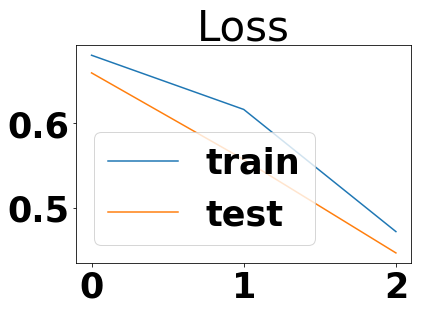

In [196]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

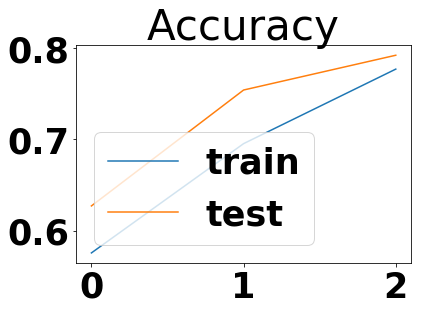

In [197]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [198]:
udata['clean_text_lemmatized']

['good like original believe point',
 'absolutely love wonderful rendition original not compare cartoon version let movie like',
 'love movie good job director appreciate work great people year',
 'great movie original cinematography huge difference',
 'realistic fantastic special effect',
 'exactly like original',
 'visually stunning beautiful film',
 'care beyonce voice nala emotion tell read straight script disappointing',
 'think good movie overall enjoy',
 'love second lion king believe good d movie special effect amazing fandango way',
 'well version dark moment comparison original',
 'wonderful cgi stay pretty true original clever addition music lot umph character need expression face',
 'love love stick heart story tell bit new slightly different way freshness story love awesome',
 'movie true original lion king love definitely',
 'enjoy d effect feel rite voiceover great whell',
 'excellent movie funny',
 'like new version lion king show lot animal wild life sing good song ani

In [199]:
#Tokenizing text data and Padding sequence
X = tokenizer.texts_to_sequences(udata['clean_text_lemmatized'])
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (1200, 500)


In [200]:
seq = tokenizer.texts_to_sequences(udata['clean_text_lemmatized'])
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred_unseen = model.predict(padded)

In [201]:
len(pred_unseen)

1200

In [202]:
labels=[]
lstm_OUT = lstm_OUT.iloc[0:0]

In [203]:
#Getting max of Levels
labels = ['0','1']
i=0
for i in range(0,1200):
    lstm_output.append(labels[np.argmax(pred_unseen[i])])
lstm_OUT = pd.DataFrame(lstm_output)
#Exporting LSTM model output to CSV file. 
lstm_OUT.to_csv("lstm.csv")